# Universidad Politecnica Salesiana    

   #### **Integrantes:**  Erika Morocho; Jéssica Ñauta
   #### **Carrera:** Ingenieria de Sistemas.                
   #### **Asignaturas:** Sistemas Expertos; Inteligecia Artificial.

# Algoritmos de centralidad:

Los algoritmos de centralidad se utilizan para determinar la importancia de distintos nodos en una red. A continuación describiremos el algoritmo del Grado de Centralidad.


## Grado de Centralidad

### Introducción

El algoritmo Grado Centralidad se encarga de determinar las rutas más eficientes que se deben recorrer para llegar desde un nodo a otro dentro de un grafo, es utilizado para estimar la velocidad correspondiente al número de enlaces o conexiones que posee un vértice con el resto de los nodos pertenecientes al  grafo y difundir información de forma eficiente.

Dentro del análisis del  algoritmo de centralidad se calcula por cada uno de los vértices la suma de sus distancias con el resto de los nodos, tomando en cuenta el cálculo de las rutas más cortas entre todos los pares de nodos,este cálculo se invierte para determinar la puntuación de cercanía o proximidad de dicho nodo.

La centralidad de cercanía es tomada en cuenta para investigar el comportamiento de los individuos dentro de un esquema de redes organizacionales

los resultados de estos algoritmos pueden ser interpretados como una estimación de llegada de la información transmitida dentro de un canal de telecomunicaciones. Sirviendo también para estimar las rutas más cortas de servicios de entrega de paquetería


### Descripción del algoritmo.

### Historia:
Grado Centralidad fue propuesta por Linton C. Freeman en su documento de 1979 “Centralidad en redes sociales. Aclaración conceptual”. Si bien el algoritmo de grado de centralidad se puede usar para encontrar la popularidad de los nodos individuales, a menudo se usa como parte de un análisis global donde calculamos el grado mínimo, el grado máximo, el grado medio y la desviación estándar en todo el gráfico.


### ¿Qué es?
El algoritmo Grado Centralidad es la medida más simple y directa de las medidas de centralidad. Esta corresponde en términos simples al número de enlaces o conexiones que posee un vértice con el resto de los nodos pertenecientes a un grafo. 

### Casos de uso de un algoritmo de grado de centralidad
Los algoritmos de grado de centralidad  son componentes muy interesantes para conocer el grado de influencia que puede tenerse dentro de un entorno determinado. Esto es de gran utilidad en la actualidad para realizar análisis en redes de interconexión como las redes sociales. Este algoritmo evalúa los nodos pertenecientes a un grafo y determina cuál tiene mayor nivel de conexiones, otorgando una puntuación determinada. Mientras mayor sea la puntuación, mayor será el grado de influencia.
Cuando se pondera el valor que devuelve el algoritmo al analizar un grafo, este número puede ser utilizado para distinguir a usuarios que pretenden distorsionar datos en entornos controlados como sitios de subasta en línea.

 


### Proceso:

#### 1. Crear los nodos con sus Relaciones

    CREATE (alice:User {name: 'Alice'}),
           (bridget:User {name: 'Bridget'}),
       
           (alice)-[:FOLLOWS]->(bridget)

#### 2. Lo siguiente ejecutará el algoritmo y los resultados de la transmisión, mostrando qué usuarios tienen más seguidores: 
CALL gds.alpha.degree.stream({

  nodeProjection: 'User',
  
  relationshipProjection: {
  
    FOLLOWS: {
      type: 'FOLLOWS',
      orientation: 'REVERSE'
    }
  }
  
})

YIELD nodeId, score

RETURN gds.util.asNode(nodeId).name AS name, score AS followers

ORDER BY followers DESC

#### 3. Lo siguiente ejecutará el algoritmo y los resultados de la transmisión, mostrando qué usuarios siguen a la mayoría de los otros usuarios: 

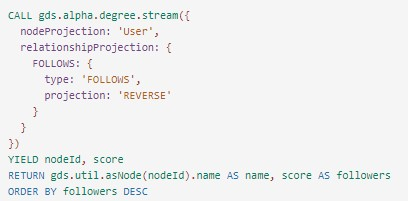

### Ejemplos sencillos:
Análisis de un grafo que toma los datos en una red social parecida a Twitter, en la que algunos miembros de la comunidad de usuarios se sigue entre sí. Con este ejemplo intentaremos determinar cuál de los usuarios de la red social posee mayor grado de influencia en base a sus conexiones.

#### 1. Crear gráfico de muestra con sus respectivas relaciones.

##### Código:

CREATE (alice:User {name: 'Alice'}),

       (bridget:User {name: 'Bridget'}),    
       (charles:User {name: 'Charles'}),       
       (doug:User {name: 'Doug'}),       
       (mark:User {name: 'Mark'}),       
       (michael:User {name: 'Michael'}),       
       (alice)-[:FOLLOWS]->(doug),
       (alice)-[:FOLLOWS]->(bridget),
       (alice)-[:FOLLOWS]->(charles),
       (mark)-[:FOLLOWS]->(doug),
       (mark)-[:FOLLOWS]->(michael),
       (bridget)-[:FOLLOWS]->(doug),
       (charles)-[:FOLLOWS]->(doug),
       (michael)-[:FOLLOWS]->(doug)

##### Resultado:
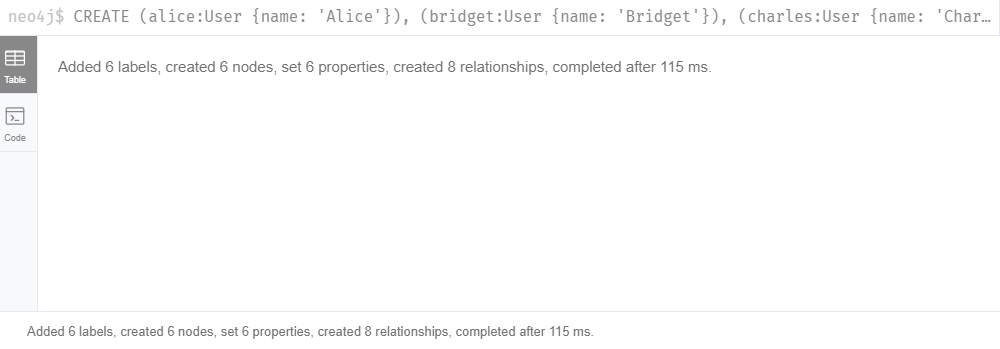

#### Gráfico de nodos: 

match (n) return n
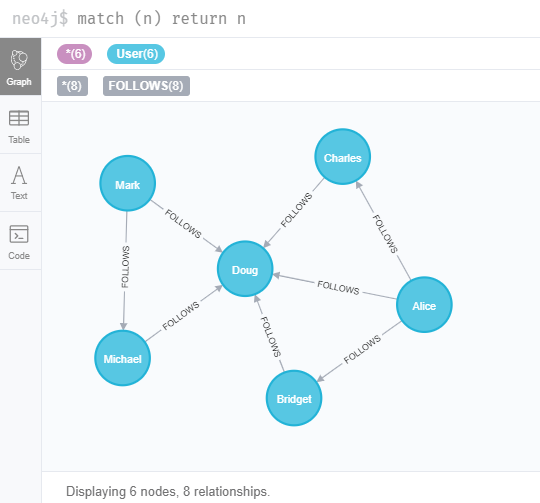

#### 2. Lo siguiente ejecutará el algoritmo y los resultados de la transmisión, mostrando qué usuarios tienen más seguidores: 

In [3]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "cuenca"), encrypted=False)
session = driver.session()

In [5]:
result = session.run("""CALL gds.alpha.degree.stream({
nodeProjection: 'User',
relationshipProjection: {
FOLLOWS: {
  type: 'FOLLOWS',
  orientation: 'REVERSE'
}
} }) YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name AS name, score AS followers
ORDER BY followers DESC""")
DataFrame(result)

0    1
0     Doug  5.0
1  Bridget  1.0
2  Charles  1.0
3  Michael  1.0
4    Alice  0.0
5     Mark  0.0

##### Resultado:
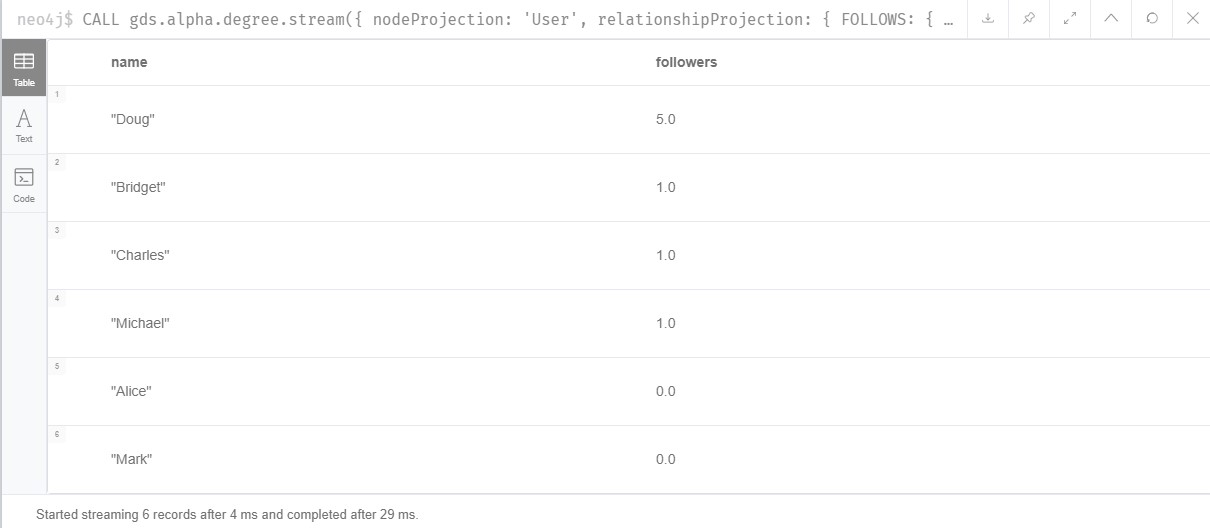

#### 3. Lo siguiente ejecutará el algoritmo y los resultados de la transmisión, mostrando qué usuarios siguen a la mayoría de los otros usuarios: 

In [6]:
result = session.run("""CALL gds.alpha.degree.stream({
nodeProjection: 'User',
relationshipProjection: {
FOLLOWS: {
  type: 'FOLLOWS',
  projection: 'REVERSE'
}
} }) YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name AS name, score AS followers
ORDER BY followers DESC""")
DataFrame(result)

0    1
0    Alice  3.0
1     Mark  2.0
2  Bridget  1.0
3  Charles  1.0
4  Michael  1.0
5     Doug  0.0

##### Resultado:
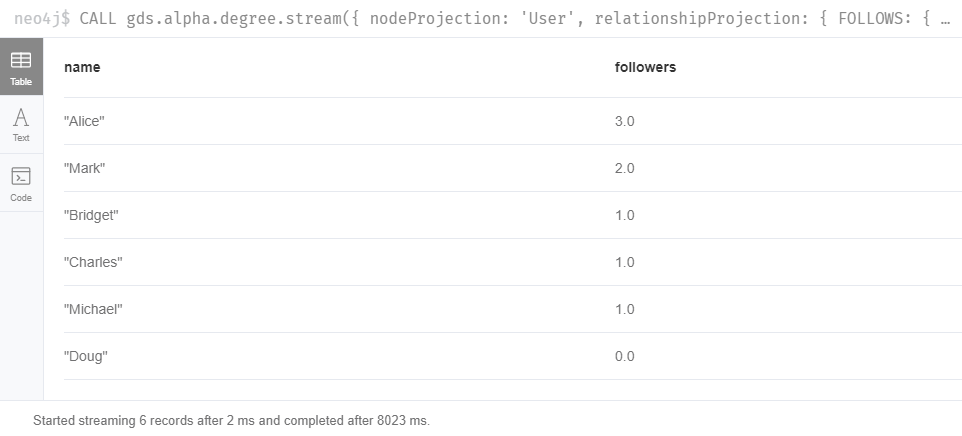

### Ejemplificación usando datos reales.
### CUENCA
Análisis de un grafo que toma los datos de ciertos lugares de la ciudad de Cuenca, en la que observaremos las rutas que estan conectadas directamente a un determinado lugar.


#### 1. Crear gráfico de muestra.

#### Resultado:
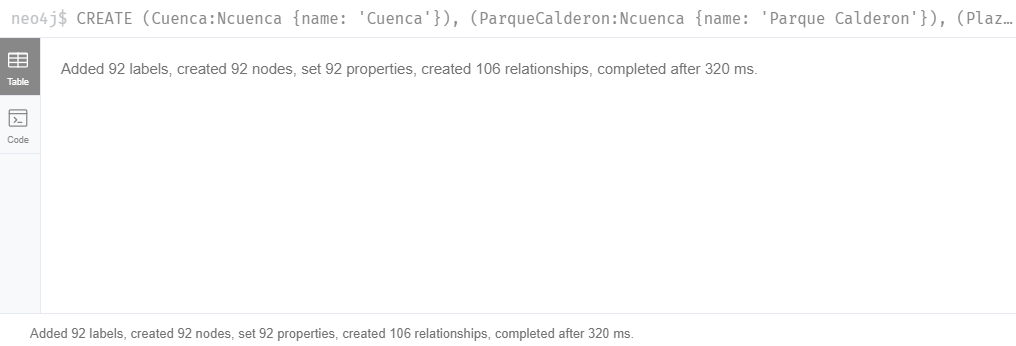

#### Gráfico de nodos:
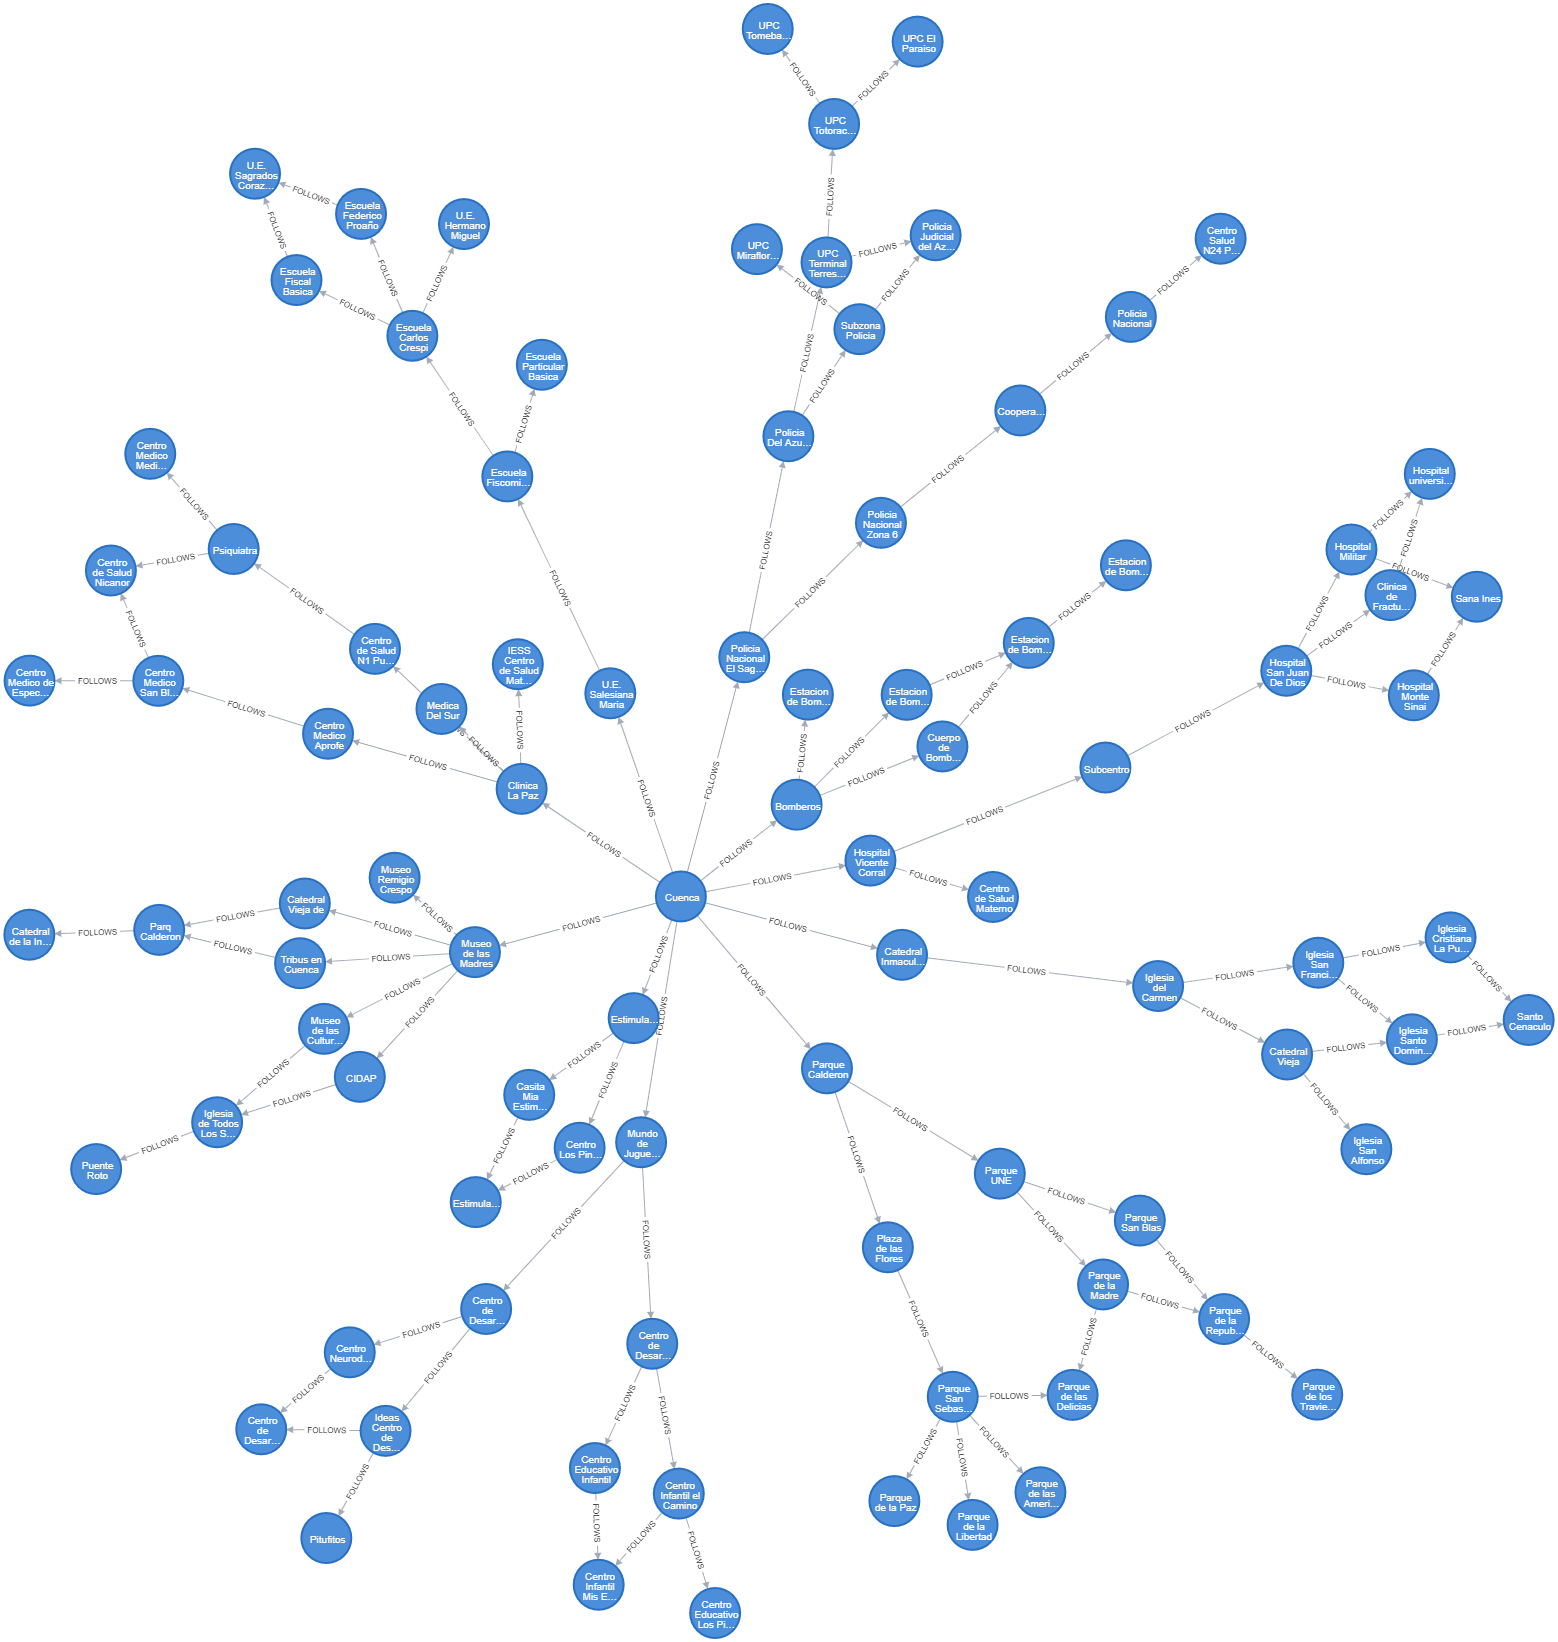

#### 2. Ejecutará el algoritmo y los resultados de la transmisión, mostrando que lugar tiene mas rutas:

In [2]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "cuenca"), encrypted=False)
session = driver.session()

In [7]:
result = session.run("""CALL gds.alpha.degree.stream({
  nodeProjection: 'Ncuenca',
  relationshipProjection: {
    FOLLOWS: {
      type: 'FOLLOWS',
      orientation: 'REVERSE'
    }
  }
})
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name AS name, score AS followers
ORDER BY followers DESC""")
DataFrame(result)

0    1
0                Parque de las Delicias  2.0
1                Parque de la Republica  2.0
2                 Iglesia Santo Domingo  2.0
3                        Santo Cenaculo  2.0
4                             Sana Ines  2.0
..                                  ...  ...
87  Centro Educativo Infantil Garabatos  1.0
88            Centro Infantil el Camino  1.0
89                            Pitufitos  1.0
90           Centro Educativo Los Pinos  1.0
91                               Cuenca  0.0

[92 rows x 2 columns]

#### Resultado:
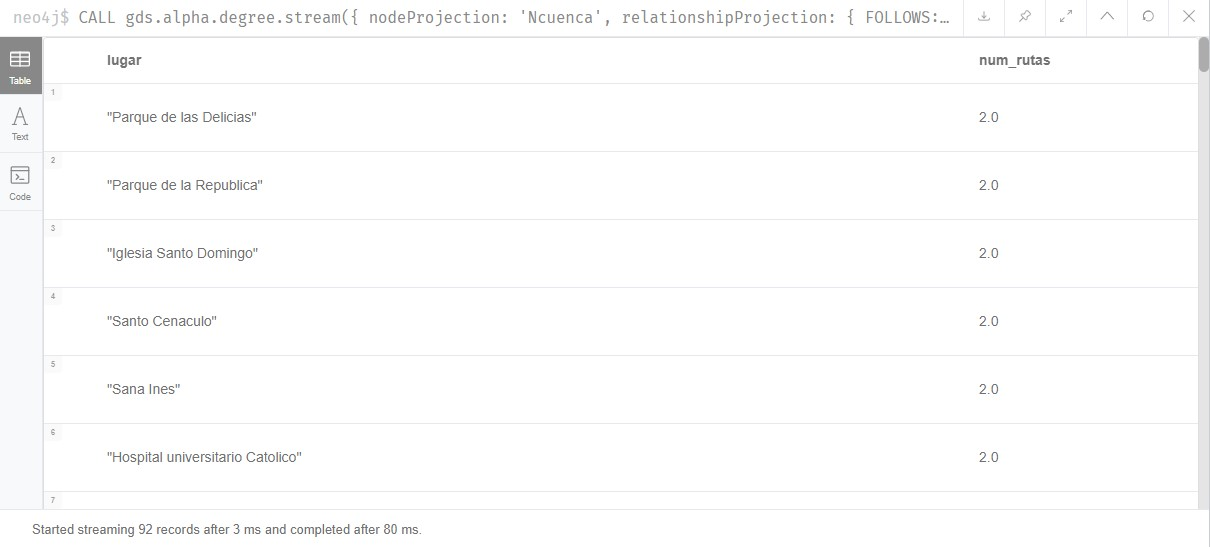

#### 3. Ejecutará el algoritmo y los resultados de la transmisión, mostrando que lugar esta conectada a la mayoria de rutas:

In [8]:
result = session.run("""CALL gds.alpha.degree.stream({
  nodeProjection: 'Ncuenca',
  relationshipProjection: {
    FOLLOWS: {
      type: 'FOLLOWS',
      projection: 'REVERSE'
    }
  }
})
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name AS name, score AS followers
ORDER BY followers DESC""")
DataFrame(result)

0     1
0                                    Cuenca  10.0
1             Museo de las Madres Conceptas   5.0
2                      Parque San Sebastian   4.0
3                            Clinica La Paz   4.0
4                 Hospital San Juan De Dios   3.0
..                                      ...   ...
87                    Estimulacion Temprana   0.0
88  Centro de Desarrollo Infantil Manchitas   0.0
89                                Pitufitos   0.0
90             Centro Infantil Mis Enanitos   0.0
91               Centro Educativo Los Pinos   0.0

[92 rows x 2 columns]

#### Resultado:
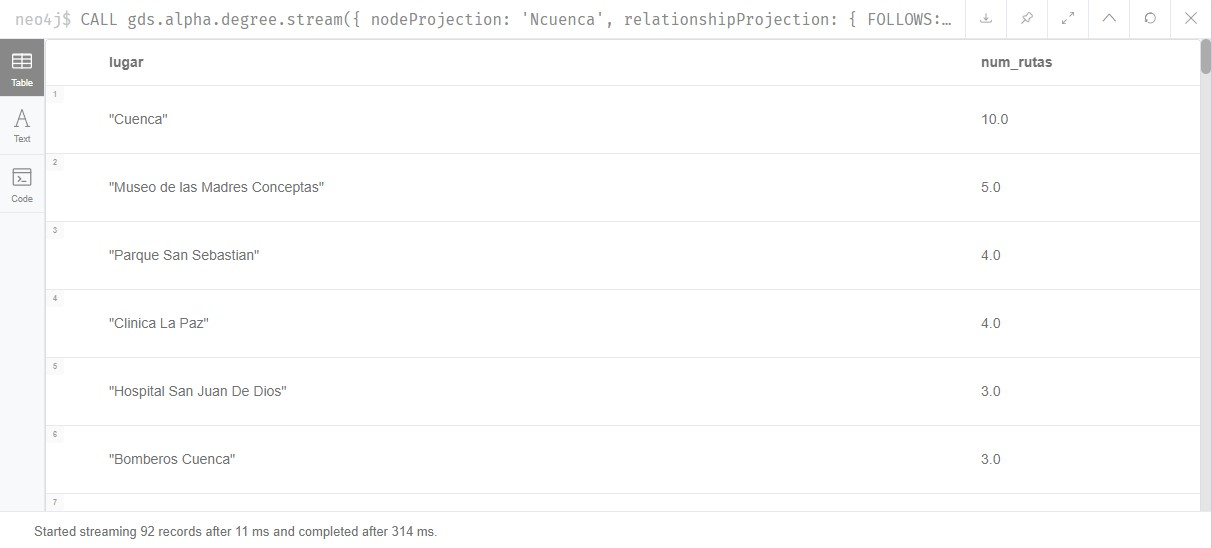

### Ejemplificación usando datos reales.
### MACHALA
Análisis de un grafo que toma los datos de ciertos lugares de la ciudad de Machala, en la que observaremos las rutas para llegar a un determinado lugar. Con este ejemplo intentaremos determinar qué ruta o por cuantos lugares debe recorrer el usuario para llegar a su destino.

#### Crear gráfico de muestra.
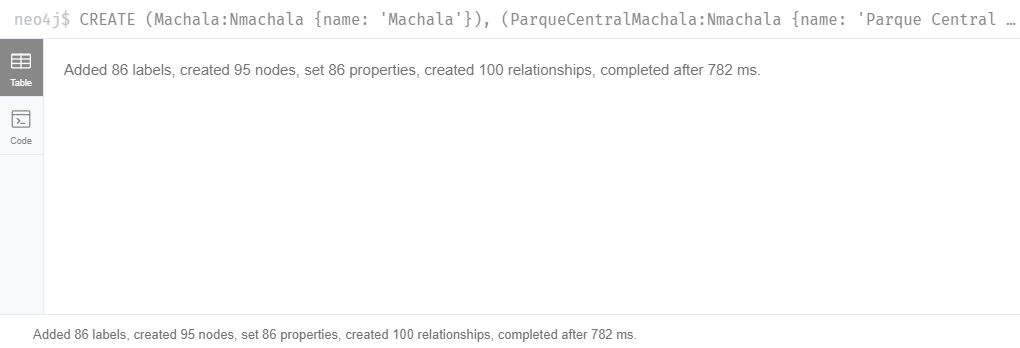

#### Gráfico de nodos:
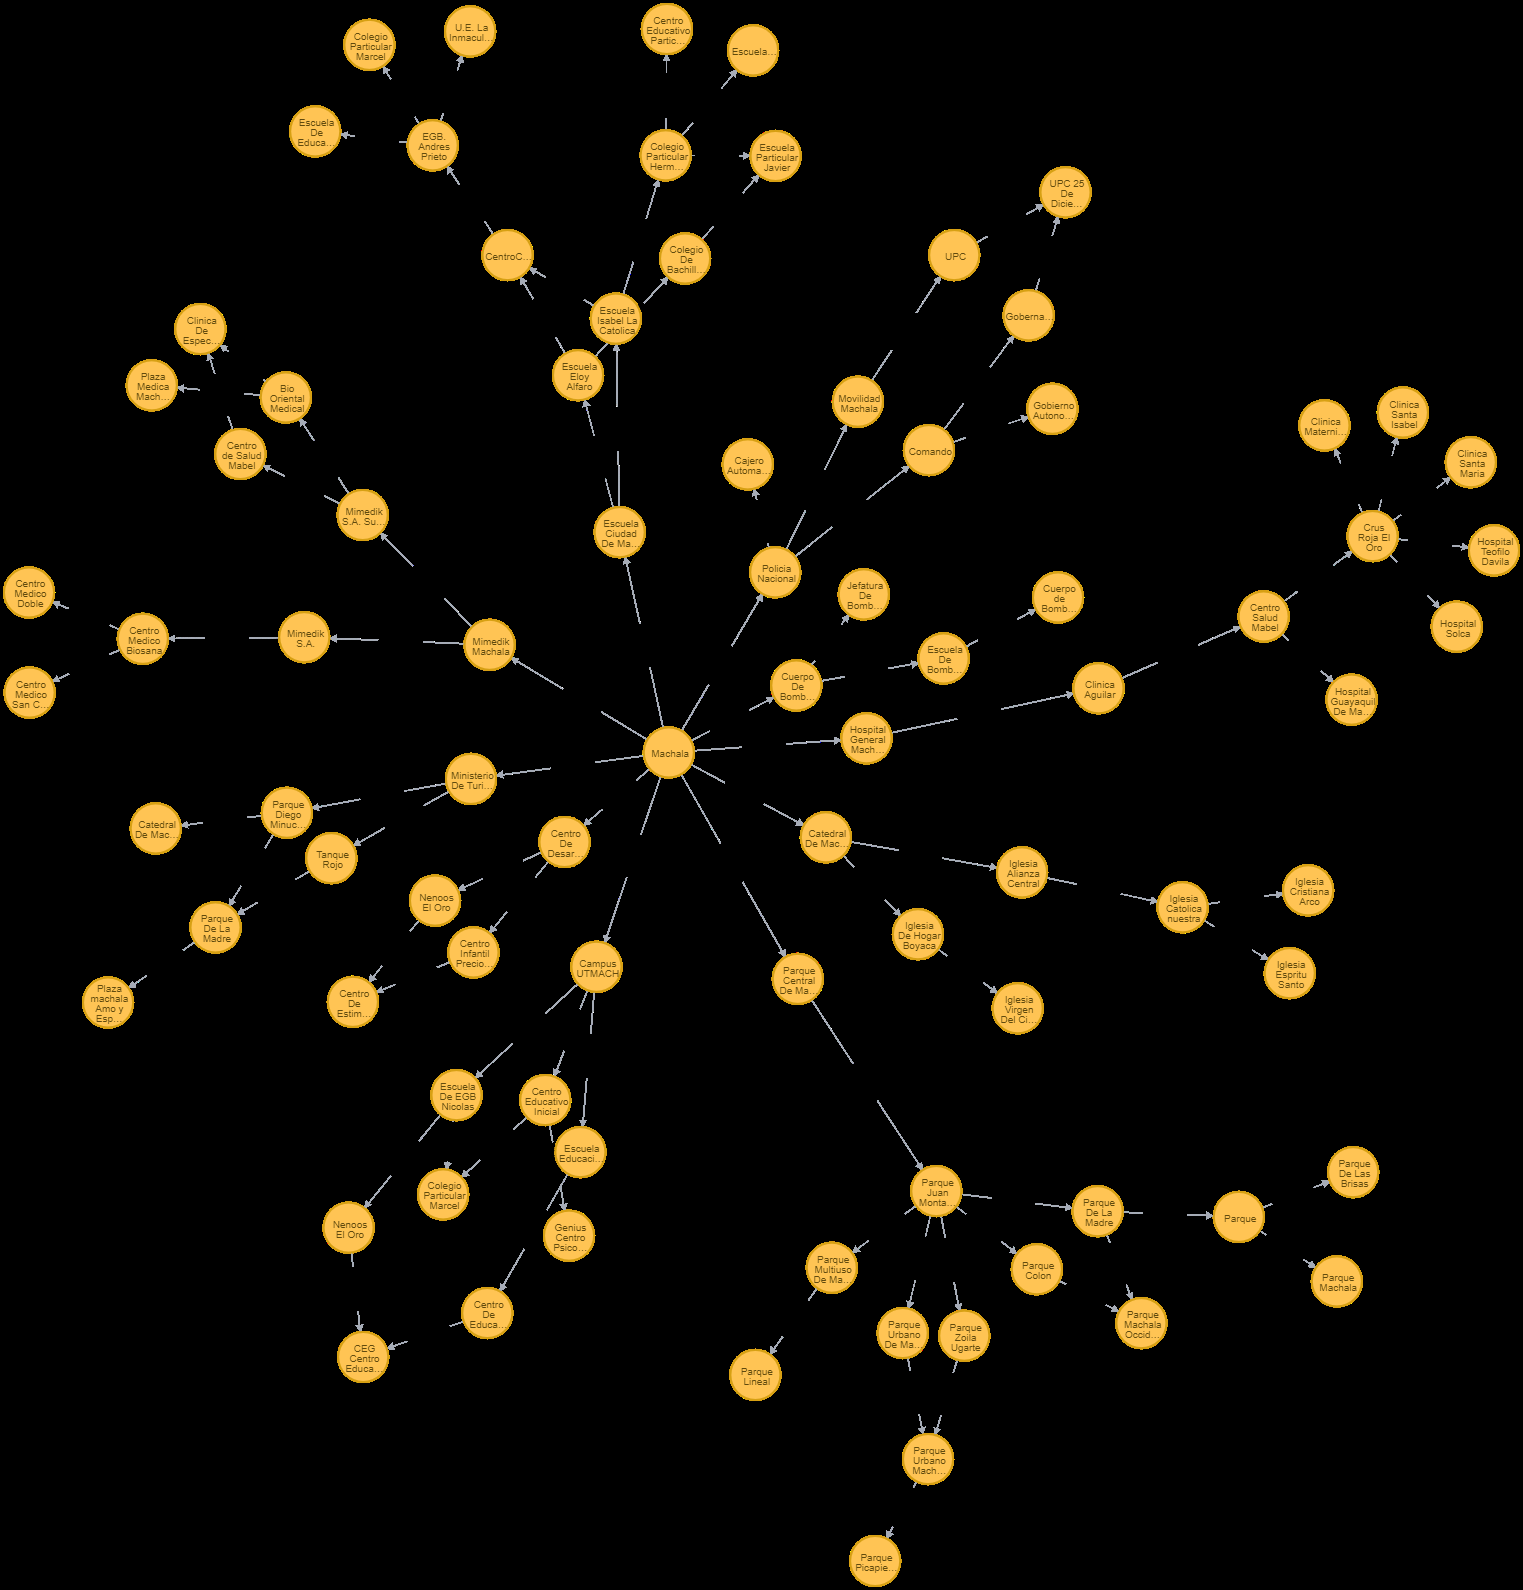

#### 2. Ejecutará el algoritmo y los resultados de la transmisión, mostrando que lugar tiene mas rutas:

In [11]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "machala"), encrypted=False)
session = driver.session()

In [12]:
result = session.run("""CALL gds.alpha.degree.stream({
  nodeProjection: 'Nmachala',
  relationshipProjection: {
    FOLLOWS: {
      type: 'FOLLOWS',
      orientation: 'REVERSE'
    }
  }
})
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name AS name, score AS followers
ORDER BY followers DESC""")
DataFrame(result)

0    1
0                              Parque Urbano Machala  2.0
1                          Parque Machala Occidental  2.0
2                                UPC 25 De Diciembre  2.0
3                              CentroCulinarioOrense  2.0
4                          Escuela Particular Javier  2.0
..                                               ...  ...
79                                     Nenoos El Oro  1.0
80  Genius Centro Psicopedagogico y De Apoyo Escolar  1.0
81                                           Machala  0.0
82                                     Parque Lineal  0.0
83                              Plaza Medica Machala  0.0

[84 rows x 2 columns]

#### 3. Ejecutará el algoritmo y los resultados de la transmisión, mostrando que lugar esta conectada a la mayoria de rutas:

In [13]:
result = session.run("""CALL gds.alpha.degree.stream({
  nodeProjection: 'Nmachala',
  relationshipProjection: {
    FOLLOWS: {
      type: 'FOLLOWS',
      projection: 'REVERSE'
    }
  }
})
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name AS name, score AS followers
ORDER BY followers DESC""")
DataFrame(result)

0     1
0                                             Machala  10.0
1                                    Crus Roja El Oro   5.0
2                                Parque Juan Montalvo   4.0
3                                    Policia Nacional   3.0
4                   Colegio Particular Hermano Miguel   3.0
..                                                ...   ...
79                      Plaza machala Amo y Esperanza   0.0
80  Centro De Estimulacion Temprana y Desarrollo I...   0.0
81          Colegio Particular Marcel Laniado De Wind   0.0
82   Genius Centro Psicopedagogico y De Apoyo Escolar   0.0
83                  CEG Centro Educativo Gastronomico   0.0

[84 rows x 2 columns]

#### Resultados y análisis:

Como resultado tenemos la cantidad de nodos o rutas que se conectan directamente a cada uno de los lugares planteados en el ejemplo. 

#### Recomendaciones:

Este algoritmo es usado para datos de redes sociales, porque permite encontrar la popularidad de un individuo y observar cuantos seguidores tiene, tambien es recomendado usar para lugares de ciertas ciudades ya que permite visualizar cuantos lugares se conectan directamente al lugar en el que estoy o deseo ir.

#### Conclusiones y trabajos futuros:

Este algoritmo permite identificar el número de seguidores de un individuo y también el número de rutas que estan conectadas a un lugar, este algoritmo es muy eficiente para redes sociales ya que ayuda a obtener las conexiones que posee un vertice con el resto de nodos pertenecientes a un grafo.

Para trabajos futuros nos gustaría implementar este algoritmo para redes sociales con datos reales y para para calcular las rutas de servicio de entrega de paquetería.

# Algoritmos de búsqueda de ruta
Los algoritmos de búsqueda de ruta encuentran la ruta más corta entre dos o más nodos o evalúan la disponibilidad y la calidad de las rutas. 

## Ruta más corta

### Introducción:
El algoritmo de ruta más corta calcula la ruta más corta entre un par de nodos. Se ha investigado desde el siglo XIX. Ganó prominencia a principios de la década de 1950 en el contexto de 'enrutamiento alternativo', es decir, encontrar una segunda ruta más corta si la ruta más corta está bloqueada.

A Dijkstra se le ocurrió su algoritmo en 1956 mientras intentaba encontrar algo para mostrar las nuevas computadoras ARMAC. Necesitaba encontrar un problema y una solución que las personas no familiarizadas con la informática pudieran entender, y diseñó lo que ahora se conoce como el algoritmo de Dijkstra. Más tarde lo implementó para un mapa de transporte ligeramente simplificado de 64 ciudades en los Países Bajos. A continuación trataremos más información sobre este algoritmo y algunos ejemplos para conocer su funcionamiento.

### Descripción del algoritmo.
#### ¿Qué es? 
El algoritmo de la ruta más corta es un algoritmo eficiente que sirve para encontrar el camino de coste mínimo desde un nodo origen a todos los demás nodos del grafo. Fue diseñado por el holandés Edsger Wybe Dijkstra en 1956. Este algoritmo es un típico ejemplo de algoritmo ávido, que resuelve los problemas en sucesivos pasos, seleccionando en cada paso la solución más óptima con el objeto de resolver el problema.


#### Casos de uso: cuándo usar el algoritmo de ruta más corta
* Encontrar direcciones entre ubicaciones físicas. Este es el uso más común, y las herramientas de mapeo web como Google Maps usan el algoritmo de ruta más corta, o una variante del mismo, para proporcionar direcciones de manejo.
* Las redes sociales pueden usar el algoritmo para encontrar los grados de separación entre las personas. Por ejemplo, cuando ve el perfil de alguien en LinkedIn, le indicará cuántas personas lo separan en el gráfico de conexiones, además de enumerar sus conexiones mutuas.

#### Restricciones: cuándo no utilizar el algoritmo de ruta más corta
Dijkstra no soporta pesos negativos. El algoritmo asume que agregar una relación a una ruta nunca puede hacer una ruta más corta, una invariante que se violaría con pesos negativos.

### Proceso:

#### 1. Crear los nodos con sus relaciones y respectivos costos:
           
    CREATE (a:Loc {name: 'A'}),
           (b:Loc {name: 'B'})
       
           (a)-[:ROAD {cost: 50}]->(b)

#### 2. Ejecutar el algoritmo y los resultados de trasmición:
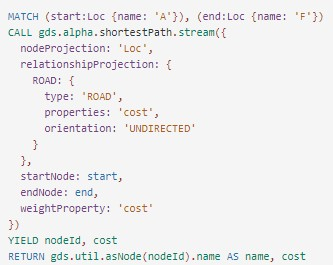

#### 3. Lo siguiente ejecutará el algoritmo y reescribirá los resultados y mostrara el numero total de nodos con el costo total:
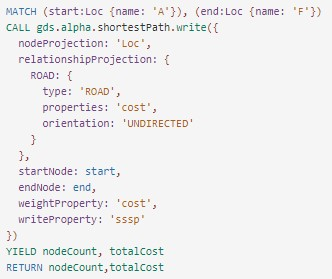

### Ejemplos sencillos:
Análisis de un grafo para calcular la ruta con un coste mínimo desde el nodo inicial A hasta el nodo objetivo F.

#### Crear gráfico de muestra con sus respectivas relaciones.

##### Código:

CREATE (a:Loc {name: 'A'}),

       (b:Loc {name: 'B'}),
       (c:Loc {name: 'C'}),
       (d:Loc {name: 'D'}),
       (e:Loc {name: 'E'}),
       (f:Loc {name: 'F'}),
       
       (a)-[:ROAD {cost: 50}]->(b),
       (a)-[:ROAD {cost: 50}]->(c),
       (a)-[:ROAD {cost: 100}]->(d),
       (b)-[:ROAD {cost: 40}]->(d),
       (c)-[:ROAD {cost: 40}]->(d),
       (c)-[:ROAD {cost: 80}]->(e),
       (d)-[:ROAD {cost: 30}]->(e),
       (d)-[:ROAD {cost: 80}]->(f),
       (e)-[:ROAD {cost: 40}]->(f);



##### Resultado:
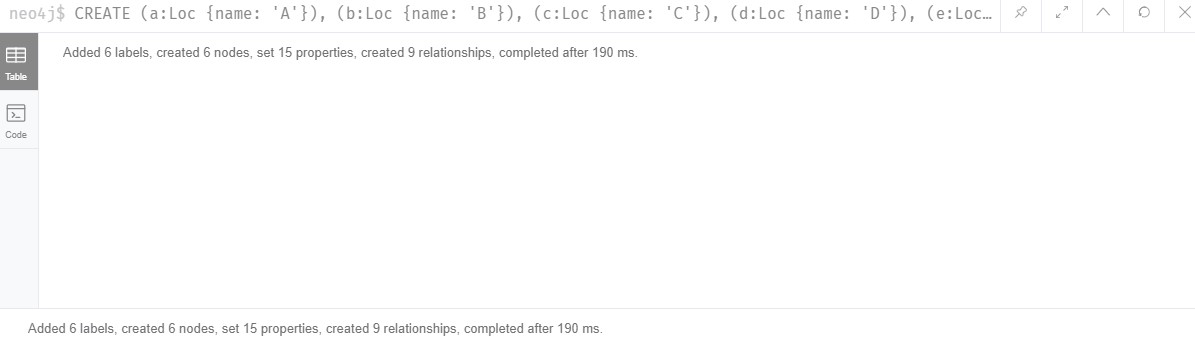

#### Grafico de nodos:
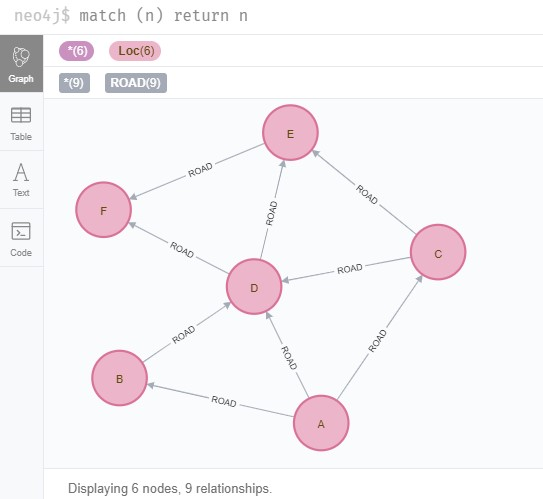

#### Lo siguiente ejecutará el algoritmo y los resultados de la transmisión con sus respectivos costos:

In [5]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:11003", auth=("neo4j", "loja"), encrypted=False)
session = driver.session()

In [7]:
result = session.run("""MATCH (start:Loc{name: "A"}),(end:Loc{name:"F"})
CALL gds.alpha.shortestPath.stream({
  nodeQuery: 'MATCH (n:Loc) RETURN id(n) AS id',
  relationshipQuery: 'MATCH (n:Loc)-[r:ROAD]->(m:Loc) RETURN id(n) AS source, id(m) AS target, r.cost AS weight',
  startNode: start,
  relationshipWeightProperty: 'weight',
  endNode: end
})
YIELD nodeId, cost
RETURN gds.util.asNode(nodeId).name AS name, cost""")
DataFrame(result)

0      1
0  A    0.0
1  B   50.0
2  D   90.0
3  E  120.0
4  F  160.0

##### Resultado:
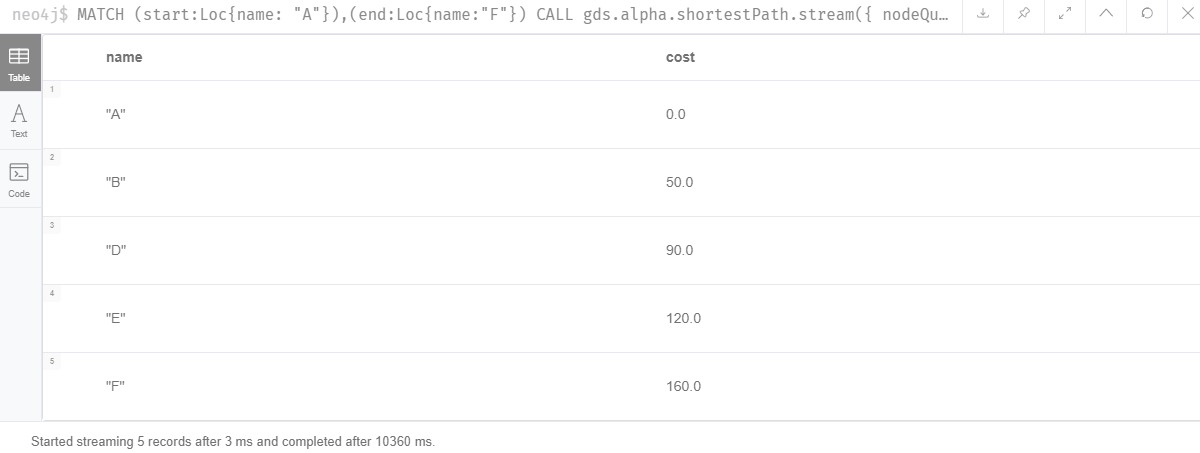

#### Lo siguiente ejecutará el algoritmo y reescribirá los resultados: 

In [8]:
result = session.run("""MATCH (start:Loc {name: 'A'}), (end:Loc {name: 'F'})
CALL gds.alpha.shortestPath.write({
  nodeQuery:'MATCH(n:Loc) WHERE NOT n.name = "c" RETURN id(n) AS id',  
  relationshipQuery:'MATCH(n:Loc)-[r:ROAD]->(m:Loc) RETURN id(n) AS source, id(m) AS target, r.cost AS weight',
  startNode: start,  
  endNode: end,  
  writeProperty: 'sssp'  
})
YIELD nodeCount, totalCost
RETURN nodeCount,totalCost""")
DataFrame(result)

0    1
0  3  2.0

##### Resultado:
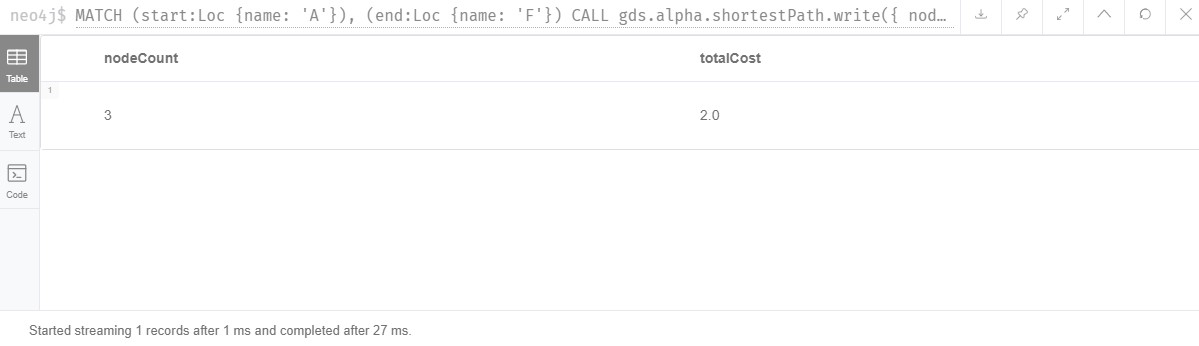

### Ejemplificación usando datos reales.
## LOJA
Un chofer de transporte escolar de niños de 5 años se encuentra ubicada en el nodo en este caso en el cnetro de Loja, se conoce de antemano que el transportista inicia su trabajo en una nueva escuela para generar, por lo tanto, no conoce la ruta para llegar al nodo Jardín de infantes Pio Jaramillo, para llegar a dicho nodo debe atrevesar una serie de rutas que van conectadas entre sí. El tiempo de ingreso a clases de los estudiantes cada vez es menor y se hace indispensable hallar la ruta de acceso al nodo Jardín de infantes Pio Jaramillo más corta. Establezca la ruta más corta para que los estudiantes lleguen a tiempo.


#### Crear gráfico de muestra.

##### Resultado:
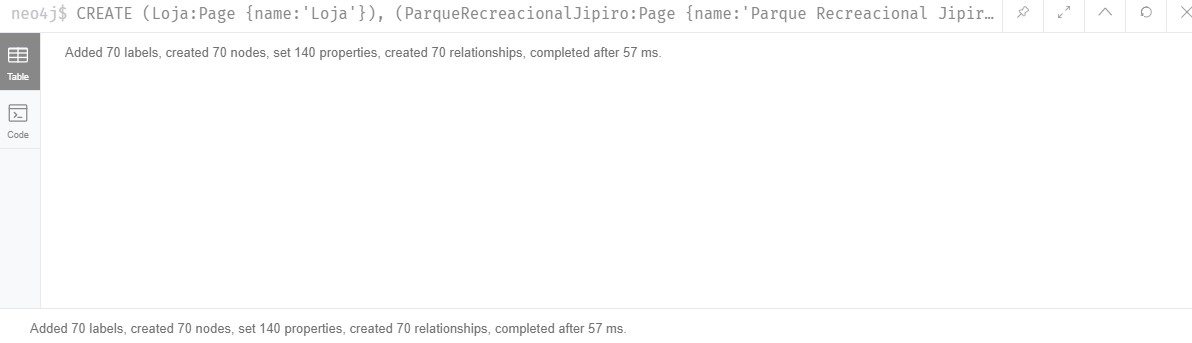

#### Grafico de nodos:
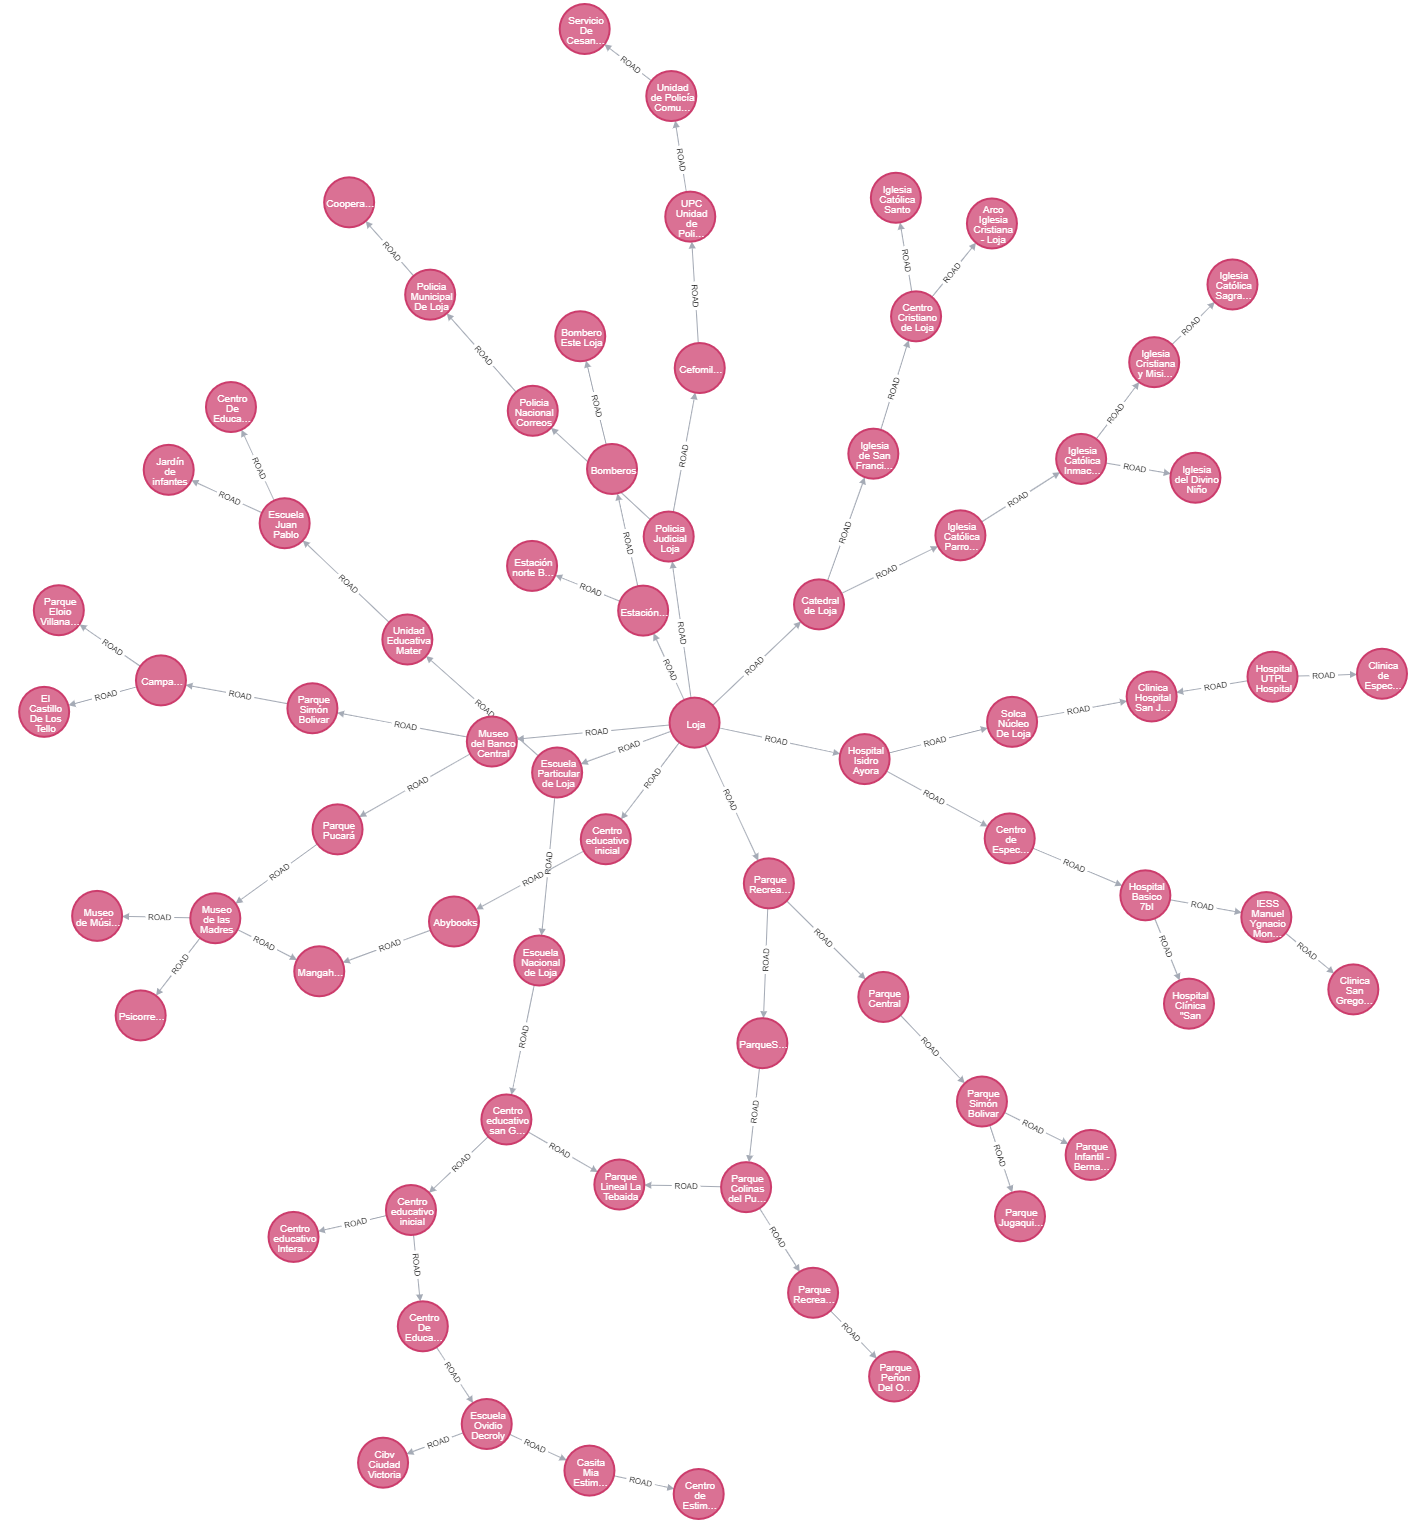

#### Ejecutar el algoritmo y los resultados de la transmisión: 

In [10]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:11003", auth=("neo4j", "loja"), encrypted=False)
session = driver.session()

In [11]:
result = session.run("""MATCH (start:Page{name: "Loja"}),(end:Page{name:"Jardín de infantes Pio Jaramillo "})
CALL gds.alpha.shortestPath.stream({
  nodeQuery: 'MATCH (n:Page) RETURN id(n) AS id',
  relationshipQuery: 'MATCH (n:Page)-[r:ROAD]->(m:Page) RETURN id(n) AS source, id(m) AS target, r.cost AS weight',
  startNode: start,
  relationshipWeightProperty: 'weight',
  endNode: end
})
YIELD nodeId, cost
RETURN gds.util.asNode(nodeId).name AS name, cost""")
DataFrame(result)

0    1
0                               Loja  0.0
1         Escuela Particular de Loja  2.2
2         Unidad Educativa Mater Dei  2.7
3         Escuela Juan Pablo segundo  5.0
4  Jardín de infantes Pio Jaramillo   5.8

#### Resultado:
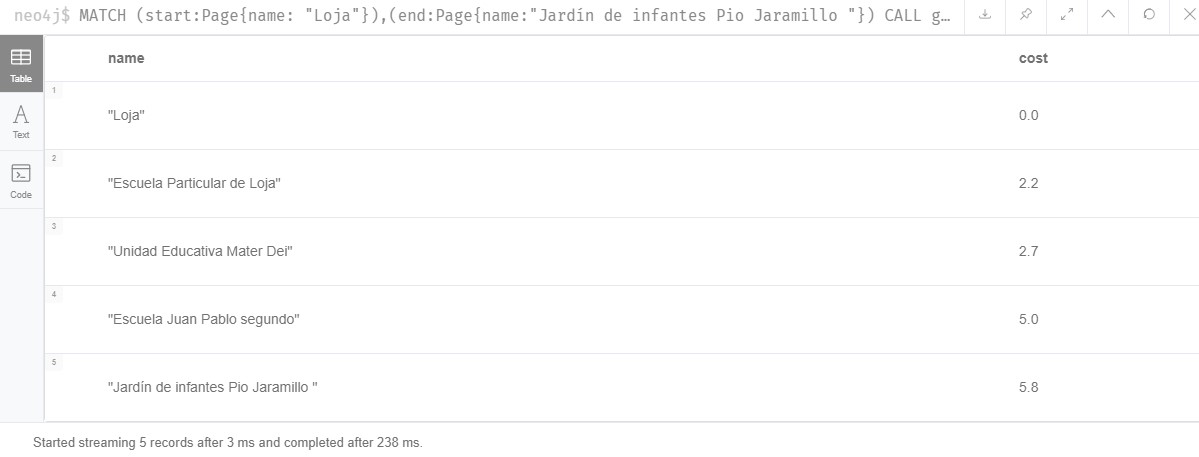

#### Lo siguiente ejecutará el algoritmo y reescribirá los resultados: 

In [12]:
result = session.run("""MATCH (start:Page {name: 'Loja'}), (end:Page {name: 'Jardín de infantes Pio Jaramillo '})
CALL gds.alpha.shortestPath.write({
  nodeQuery:'MATCH(n:Page) WHERE NOT n.name = "c" RETURN id(n) AS id',
  relationshipQuery:'MATCH(n:Page)-[r:ROAD]->(m:Page) RETURN id(n) AS source, id(m) AS target, r.cost AS weight',
  startNode: start,
  endNode: end,
  writeProperty: 'sssp'
})
YIELD nodeCount, totalCost
RETURN nodeCount,totalCost""")
DataFrame(result)

0    1
0  5  4.0

#### Resultado:
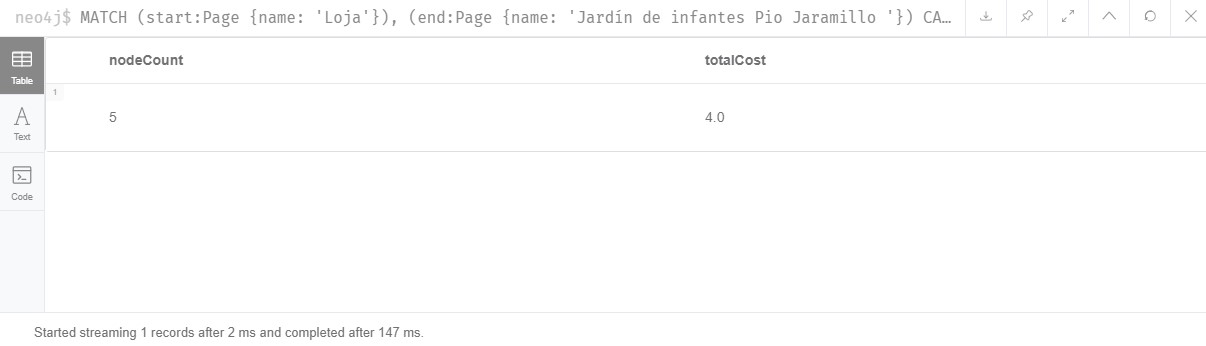

#### Resultados y análisis:

Como resultado tenemos la ruta con un costo minimo que debería seguir el transportista para llegar al nodo objetivo que en este caso seria la escuela Jardín de infantes Pio Jaramillo para que los niños lleguen a tiempo.

#### Recomendaciones:

Este algoritmo es recomendado para encontrar un lugar determinado ya que permite encontrar la ruta con un costo menor para ir de un lugar a otro optimizando de esa manera el tiempo.

#### Coclusiones y trabajos futuros:

Este algoritmo permite identificar la ruta con menor coste, en este caso es muy optimo y eficiente ya que permite encontrar la ruta con menos distancia para llegar de un lugar inicial a un lugar objetivo en menor tiempo.

Para trabajos futuros nos gustaría implementar este algoritmo para encontrar rutas para movilizarnos de un lugar a otro con datos reales, así como google maps.

# Algoritmos de predicción de enlaces
Los algoritmos de predicción de enlaces ayudan a determinar la cercanía de un par de nodos. Los puntajes calculados se pueden usar para predecir nuevas relaciones entre ellos.

## Vecinos Totales

### Introducción:
Existen algunos algoritmos de predicción de enlaces, agrupados por nivel de calidad. Uno de ello es el algoritmo Total Neighbors o Vecinos Totales el cual es un algoritmo que pertenece a la familia de predicción de enlaces, que se encarga de calcular la cercanía de los nodos pertenecientes a un grafo. A continuación trataremos más información sobre este algoritmo y algunos ejemplos para conocer su funcionamiento.


### Descripción del algoritmo.
#### ¿Qué es? 
El algoritmo Total Neighbors calcula la cercanía de los nodos pertenecientes a un grafo, en función del número de vecinos únicos que tienen. Se basa en la idea de que cuanto más conectado esté un nodo, es más probable que se añadan nuevos enlaces. 
Este algoritmo funciona bajo la implementación de una fórmula matemática que se expresa de la siguiente forma:
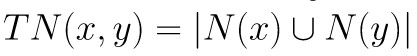
##### Donde:
* N (x): es el conjunto de los vértices adyacentes a x.
* N(y):  es el conjunto de nodos adyacentes a y. 

Dentro de los valores que podemos obtener producto de la aplicación del algoritmo, un valor cero indica que dos nodos no están cerca, mientras que los valores más altos indican que los nodos están más cerca uno de otro.


### Proceso:

#### 1. Crear los nodos con sus Relaciones:
           
    CREATE (michael:Person {name: 'Michael'}),
   
           (karin:Person {name: 'Karin'}),

           (michael)-[:WORKS_WITH]->(karin),


#### 2. Ejecutar una consulta para observar el puntaje Total de Vecinos:
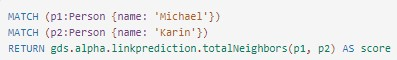

#### 3. También podemos calcular la puntuación de un par de nodos, en función de un tipo de relación específico:
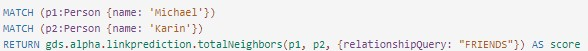

### Ejemplos sencillos:
Análisis de un grafo para calcular el numero total de vecinos que tienen de un lugar a otro, en base a la relación de los mismos.


#### Crear gráfico de muestra con sus respectivas relaciones.

##### Código:

CREATE (zhen:Person {name: 'Zhen'}),

       (praveena:Person {name: 'Praveena'}),
       (michael:Person {name: 'Michael'}),
       (arya:Person {name: 'Arya'}),
       (karin:Person {name: 'Karin'}),

       (zhen)-[:FRIENDS]->(arya),
       (zhen)-[:FRIENDS]->(praveena),
       (praveena)-[:WORKS_WITH]->(karin),
       (praveena)-[:FRIENDS]->(michael),
       (michael)-[:WORKS_WITH]->(karin),
       (arya)-[:FRIENDS]->(karin)



##### Resultado:
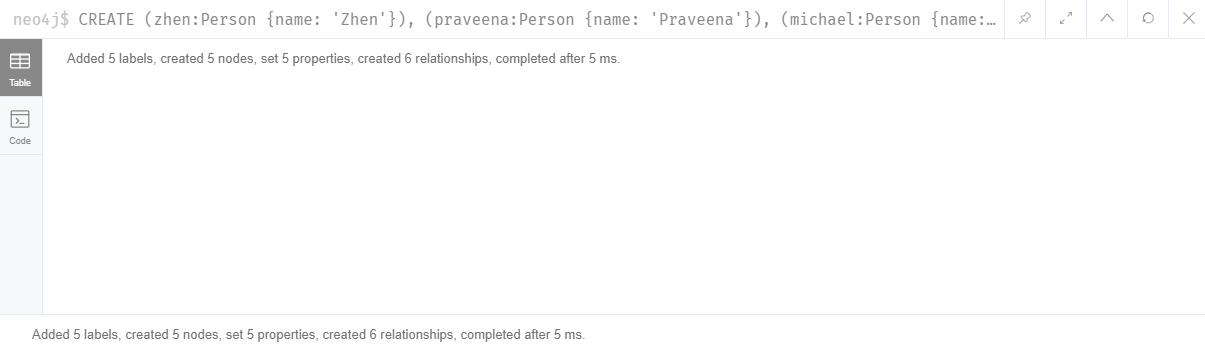

#### Gráfico de nodos: 

match (n) return n 
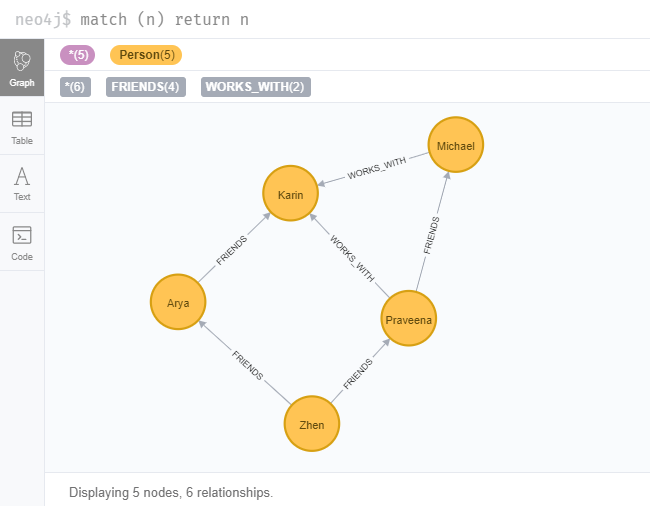

#### Lo siguiente devolverá el puntaje Total de Vecinos para Michael y Karin:

In [1]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "portoviejo"), encrypted=False)
session = driver.session()

In [2]:
result = session.run("""MATCH (p1:Person {name: 'Michael'})
MATCH (p2:Person {name: 'Karin'})
RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2) AS score""")
DataFrame(result)

0
0  4.0

##### Resultado:
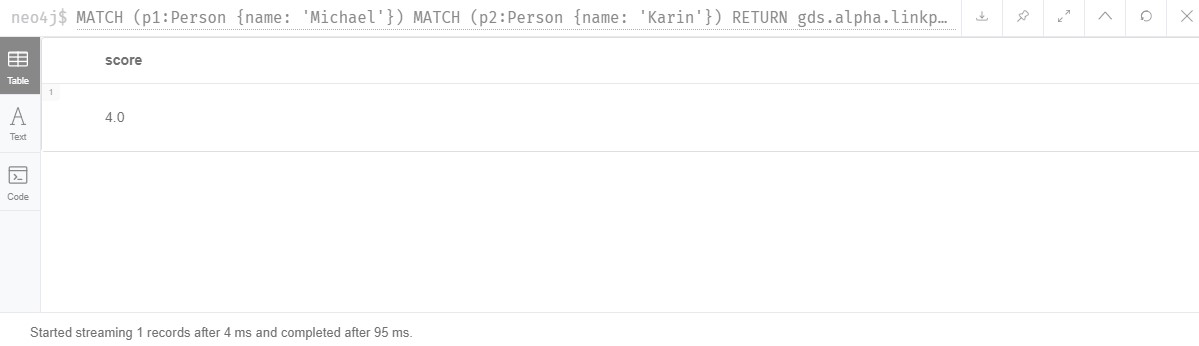

#### También podemos calcular la puntuación de un par de nodos, en función de un tipo de relación específico.

##### Lo siguiente devolverá el puntaje de Total de Vecinos para Michael y Karin basado solo en la FRIENDS relación:

In [3]:
result = session.run("""MATCH (p1:Person {name: 'Michael'})
MATCH (p2:Person {name: 'Karin'})
RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2, {relationshipQuery: "FRIENDS"}) AS score""")
DataFrame(result)

0
0  2.0

##### Resultado:
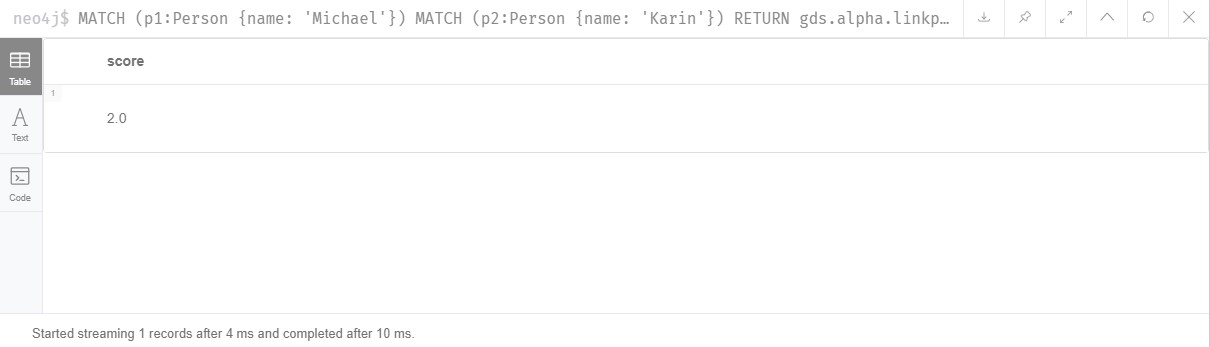

### Ejemplificación usando datos reales.
### PORTOVIEJO
Análisis de un grafo que toma los datos de ciertos lugares de la ciudad de Portoviejo, en la que observaremos el número de rutas vecinas que tiene un determinado lugar.


#### Crear gráfico de muestra.

##### Resultado:
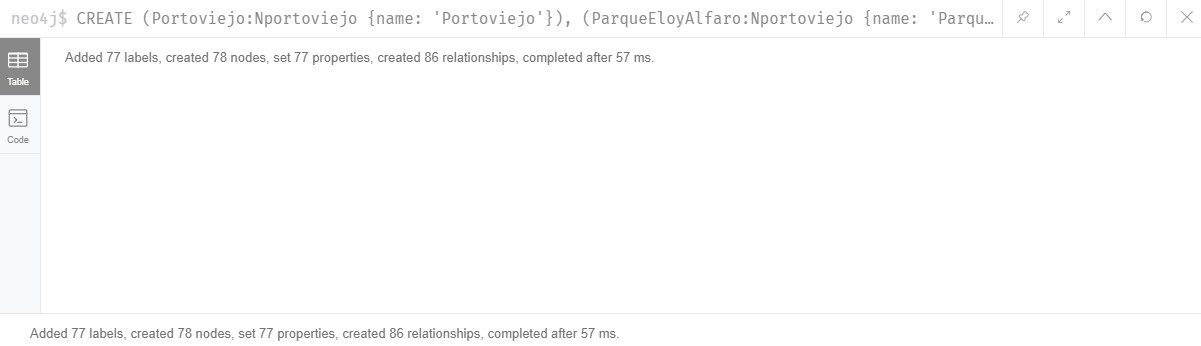

#### Grafico de Nodos: 
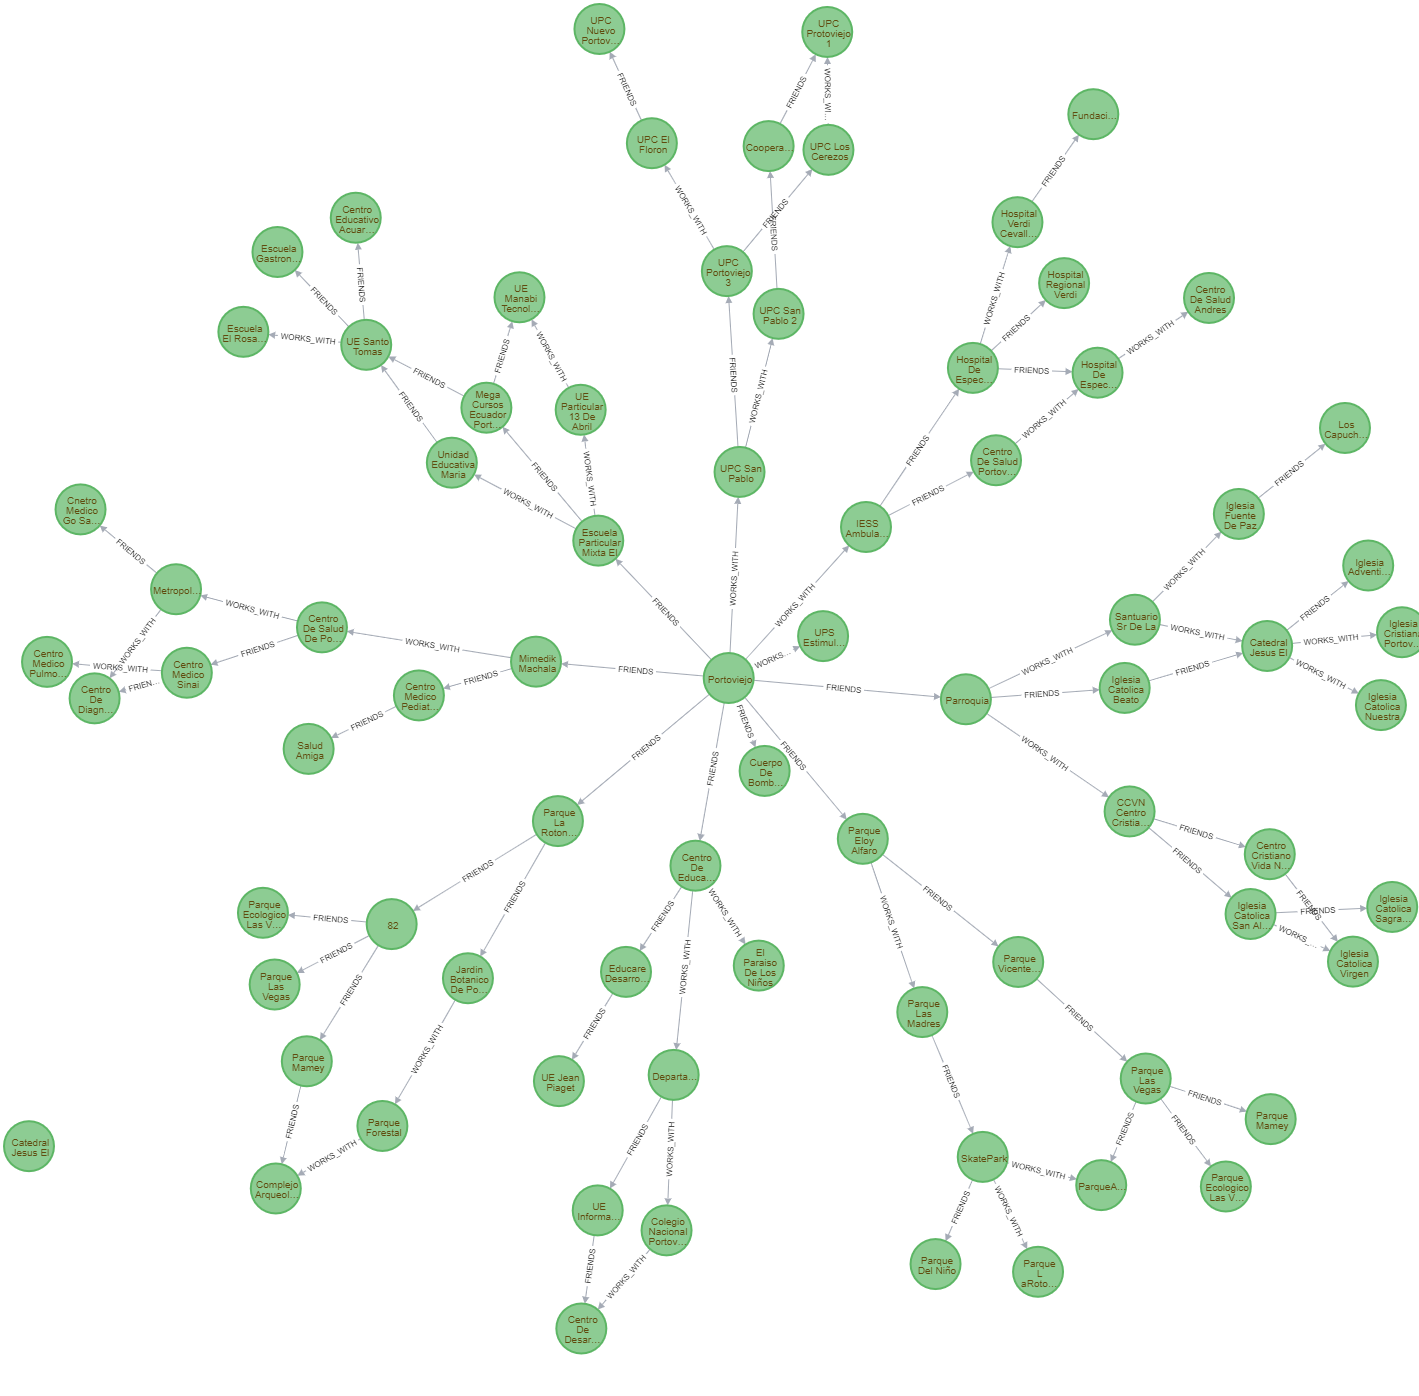

#### Lo siguiente devolverá el puntaje Total de Vecinos para la Parroquia Espiritu Santo y Santuario Sr De La Divina Misericordia:

In [40]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "portoviejo"), encrypted=False)
session = driver.session()

In [41]:
result = session.run("""MATCH (p1:Nportoviejo {name: 'Parroquia Espiritu Santo'})
MATCH (p2:Nportoviejo {name: 'Santuario Sr De La Divina Misericordia'})
RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2) AS score""")
DataFrame(result)

0
0  7.0

##### Resultado:
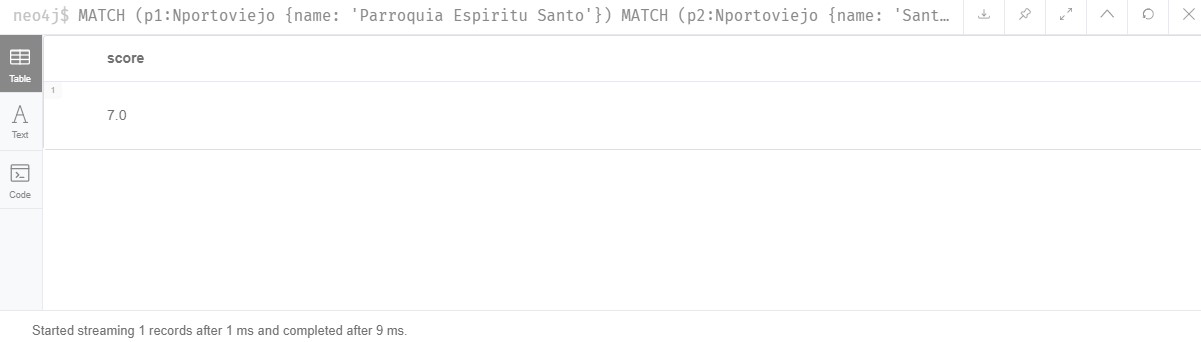

#### También podemos calcular la puntuación de un par de nodos, en función de un tipo de relación específico.
##### Lo siguiente devolverá el puntaje de Total de Vecinos para la Parroquia Espiritu Santo y Santuario Sr De La Divina Misericordia basado solo en la FRIENDS relación:

In [42]:
result = session.run("""MATCH (p1:Nportoviejo {name: 'Parroquia Espiritu Santo'})
MATCH (p2:Nportoviejo {name: 'Santuario Sr De La Divina Misericordia'})
RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2, {relationshipQuery: "FRIENDS"}) AS score""")
DataFrame(result)

0
0  2.0

##### Resultado:
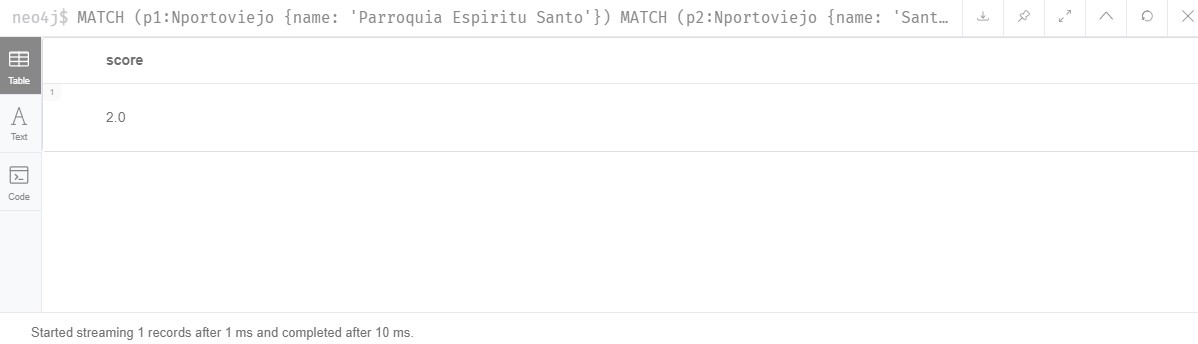

### Ejemplificación usando datos reales.
### DURAN
Análisis de un grafo que toma los datos de ciertos lugares de la ciudad de Duran, en la que observaremos el número de rutas vecinas que tiene un determinado lugar.

#### Crear gráfico de muestra.

##### Resultado:
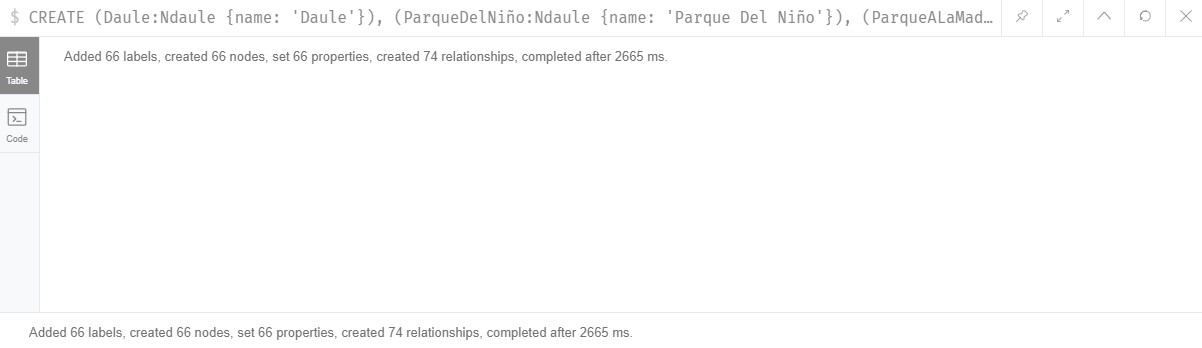

#### Grafico de Nodos:
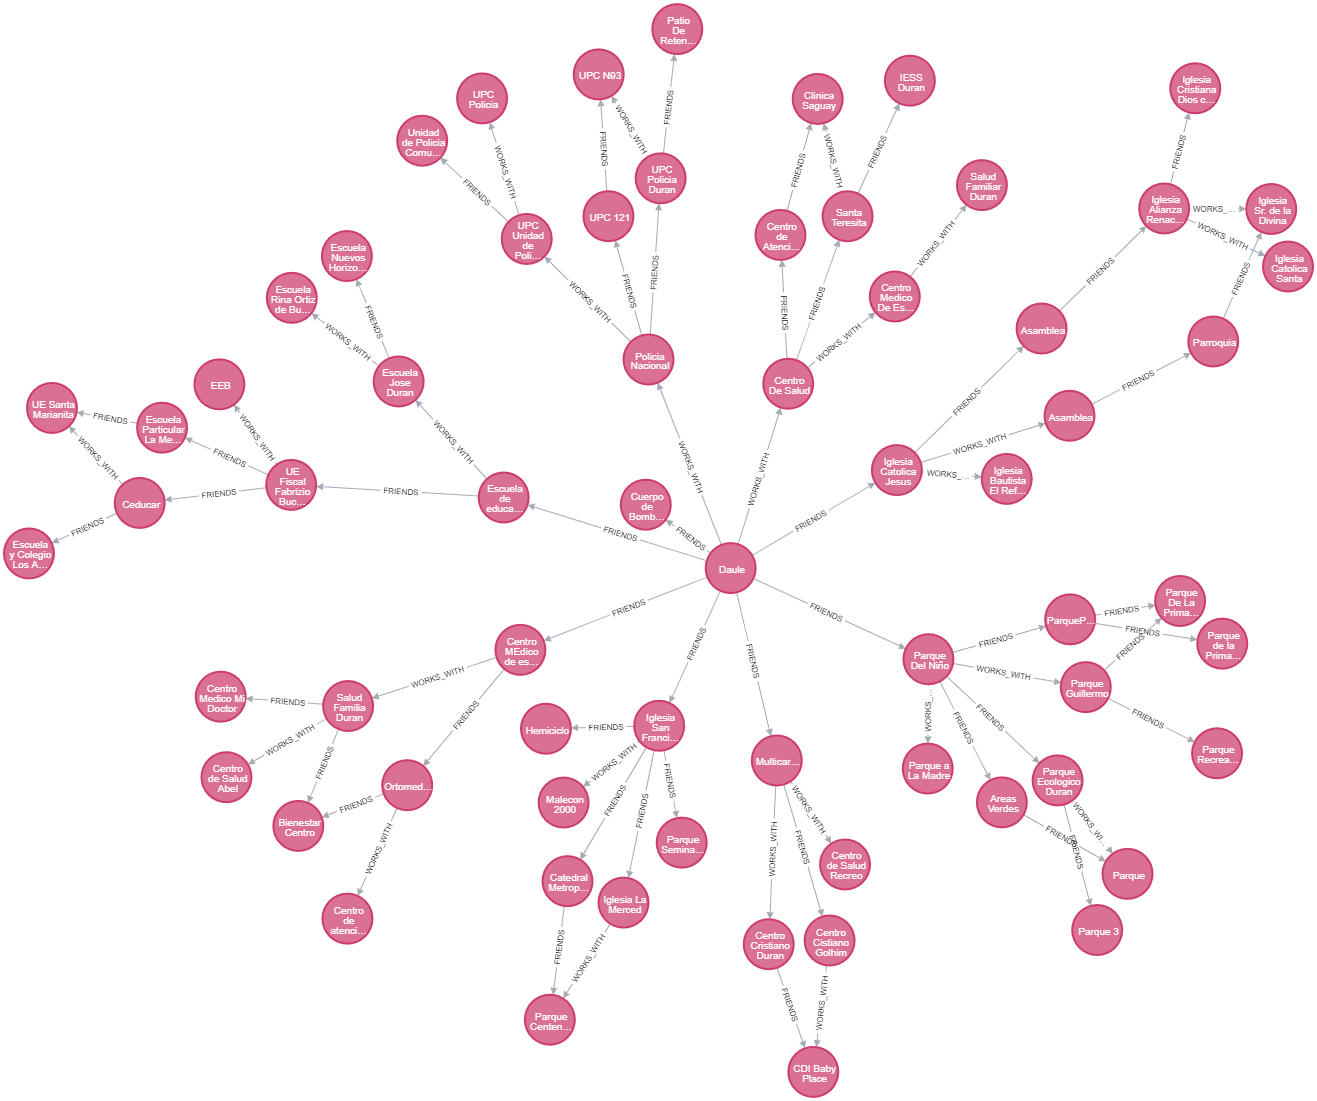

#### Lo siguiente devolverá el puntaje Total de Vecinos para la Parroquia Espiritu Santo y Santuario Sr De La Divina Misericordia:

In [43]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "duran"), encrypted=False)
session = driver.session()

In [44]:
result = session.run("""MATCH (p1:Ndaule {name: 'Parque Del Niño'})
MATCH (p2:Ndaule {name: 'Parque'})
RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2) AS score""")
DataFrame(result)

0
0  6.0

##### Resultado:
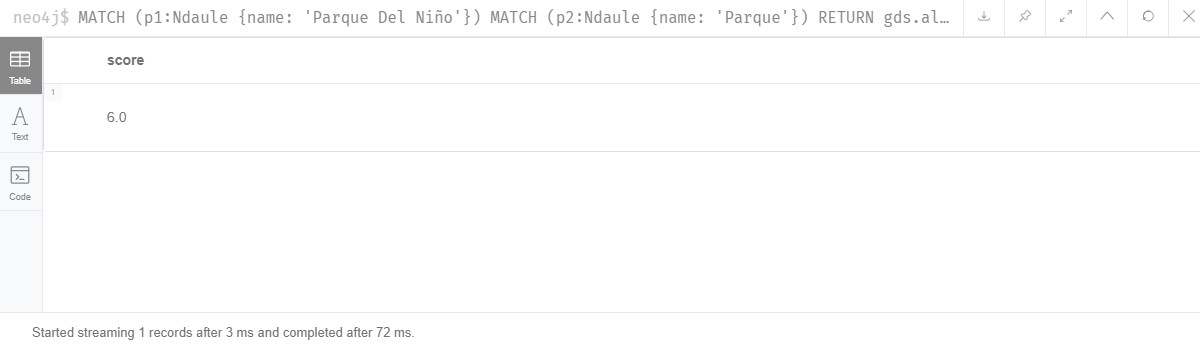

#### También podemos calcular la puntuación de un par de nodos, en función de un tipo de relación específico.

##### Lo siguiente devolverá el puntaje de Total de Vecinos para la Parroquia Espiritu Santo y Santuario Sr De La Divina Misericordia basado solo en la FRIENDS relación:

In [45]:
result = session.run("""MATCH (p1:Ndaule {name: 'Parque Del Niño'})
MATCH (p2:Ndaule {name: 'Parque'})
RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2, {relationshipQuery: "FRIENDS"}) AS score""")
DataFrame(result)

0
0  4.0

##### Resultado:
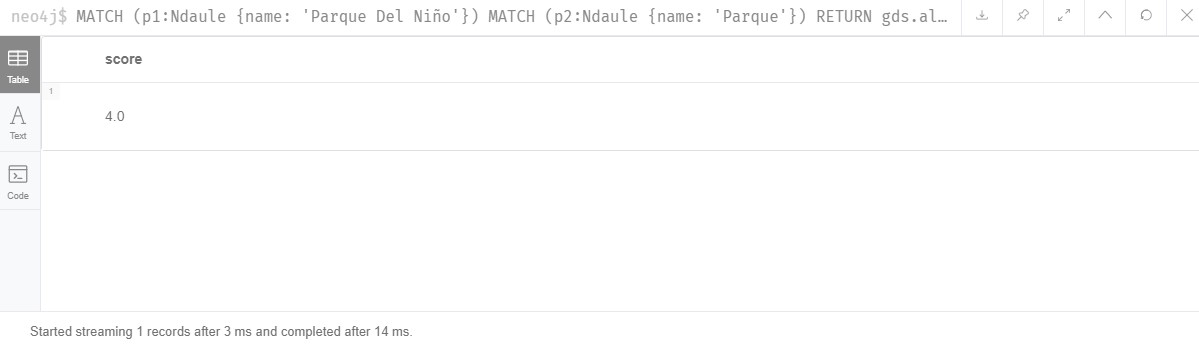

#### Resultados y análisis:

Este caso podemos observar como resultado cuantos nodos vecinos tiene cada uno de los lugares que pusimos en nuestra consulta. También podemos obtener el puntaje total de vecinos entre dos lugares basado solo en la relación FRIENDS.

#### Coclusión:

Este algoritmo nos permite calcular la cercanía de un nodo perteneciente a un grafo, en función de los vecinos que tenga y nos ayuda a obtener el número de vecinos totales o número de conexiones de un nodo dado, en estos ejemplos se uso para ver la cercania de los nodos entre personas y tambien se aplico para lugares de ciertas ciudades de nuestro país.


In [4]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "cuenca"), encrypted=False)
session = driver.session()

In [6]:
result = session.run("""MATCH (p1:Ndaule {name: 'Parque Del Niño'})
MATCH (p2:Ndaule {name: 'Parque'})
RETURN gds.alpha.linkprediction.totalNeighbors(p1, p2) AS score""")
DataFrame(result)

0
0  6.0

# Algoritmos de detección de la comunidad
Se utilizan para evaluar cómo se agrupan o particionan los grupos de nodos, así como su tendencia a fortalecerse o separarse.

## Coeficiente de agrupamiento local

### Introducion

En la teoría de grafos, un coeficiente de agrupación es una medida del grado en el que los nodos en un gráfico que tienden a agruparse juntos. La evidencia sugiere que en la mayoría de redes del mundo real , y en particular las redes sociales, los nodos tienden a crear grupos muy unidos que se caracterizan por una densidad relativamente alta de enlaces; esta probabilidad tiende a ser mayor que la probabilidad media de un lazo establecido al azar entre dos nodos.

Existen dos versiones de esta medida: la global y la  local. 
La versión global fue diseñado para dar una indicación general de la agrupación en la red, mientras que el local, da una indicación de la incrustación de los nodos individuales

### Descripcion del Algoritmo

#### ¿Qué es? 

El algoritmo de coeficiente de agrupación local se calcula como  la proporción de las conexiones entre sus vecinos que en realidad se realizan en comparación con el número de todas las conexiones posibles.

El coeficiente de agrupamiento local Cn de un nodo n describe la probabilidad de que los vecinos de n también estén conectados. 

Para calcular Cn usamos el número de triángulos que un nodo es parte de Tn , y el grado del nodo dn.

La fórmula es:

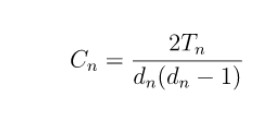

Se requiere el recuento de triángulos para calcular el coeficiente de agrupación local. Para hacer esto , se utiliza el algoritmo Triangle Count .

***Triangle Count***: Cuenta el número de los triángulos para cada nodo en el grafo.Siendo un conjunto de tre nodos donde cada nodo tiene una relación con los otros.

Por lo que el algoritmo  puede calcular el coeficiente de agrupación promedio para todo el gráfico. Esta es la suma normalizada sobre todos los coeficientes de agrupación locales.

Pasos para ejecutar  el algoritmo de coeficiente de agrupación local:

Debemos de tomar en cuenta que por lo general el algoritmo tiene dos variantes:

 ***Variante de gráfico con nombre***: El gráfico para operar se leerá del catálogo de gráficos.
 
 ***Variante gráfica anónima***:El gráfico para operar se creará y eliminará como parte de la ejecución del algoritmo.


### Uso de sintaxis dentro del grafo

1. Ejecutamos el coeficinete de agrupacion local en modo Continuo 
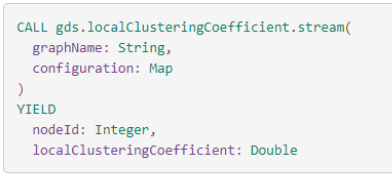

Tomando en cuenta que:
***graphName:*** su uso es opcional para el almacenamiento del grafo en el catálogo.

***Configuration:*** Es la configuración para el algoritmo específico y el filtrado de gráficos.

***nodeId:***  Es la identificación del nodo.

 2. Para la ejecución del coeficiente de agrupación local de modo estadístico.
 
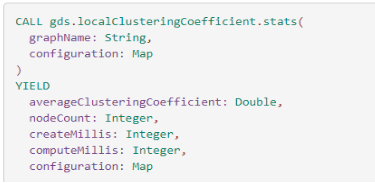

***averageClusteringCoefficient:***  Es el  coeficiente de agrupamiento promedio.

***nodeCount:*** Número de nodos en el gráfico.

***createMillis:*** Milisegundos para crear el gráfico.

***computeMillis:*** Milisegundos para ejecutar el algoritmo.

3. Para la ejecución del Coeficiente de agrupación local en modo de mutación 

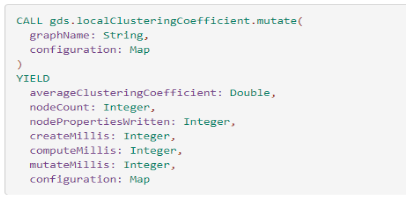

***nodePropertiesWritten:***  Número de propiedades agregadas al gráfico en memoria.

***mutateMillis:*** Milisegundos para agregar propiedades al gráfico en memoria.

También es posible ejecutar el algoritmo en un gráfico que se proyecta junto con la ejecución del algoritmo. 

1. El gráfico no tiene nombre y lo llamamos anónimo. 
2. Cuando se ejecuta sobre un gráfico anónimo, el mapa de configuración contiene una configuración de proyección de gráfico, una configuración de algoritmo.
3. Todos los modos de ejecución admiten la ejecución en gráficos anónimos, aunque solo mostramos la sintaxis y la configuración específica de write.

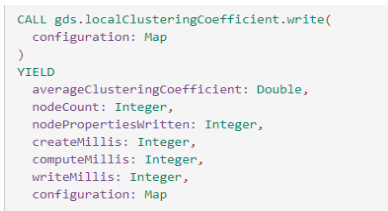

## Ejemplo Senccillo
El algoritmo de coeficiente de agrupacion local es un grafico concreto.La intención es ilustrar cómo se ven los resultados y proporcionar una guía sobre cómo utilizar el algoritmo en un entorno real. 

#### Muestra del Algoritmo (Paso a Paso)

1. Creamos la base de datos en Neo4j
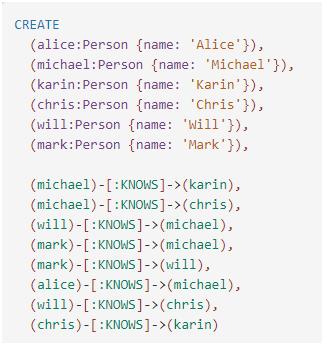
##### Resultado

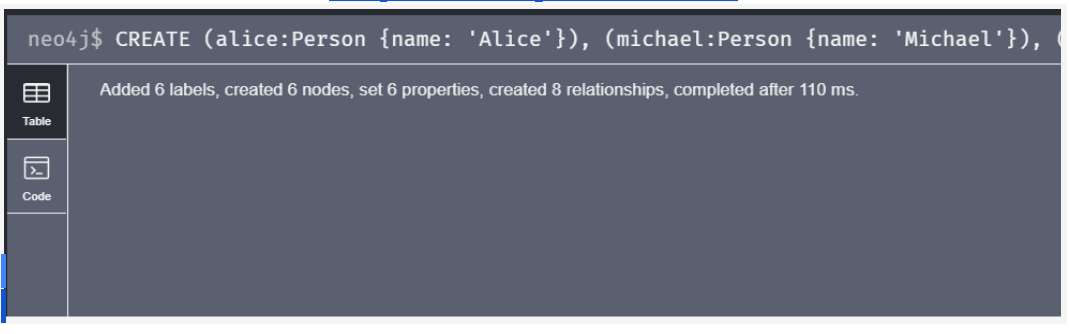
##### Grafico de nodos
2. Match(n)RETURN(n)

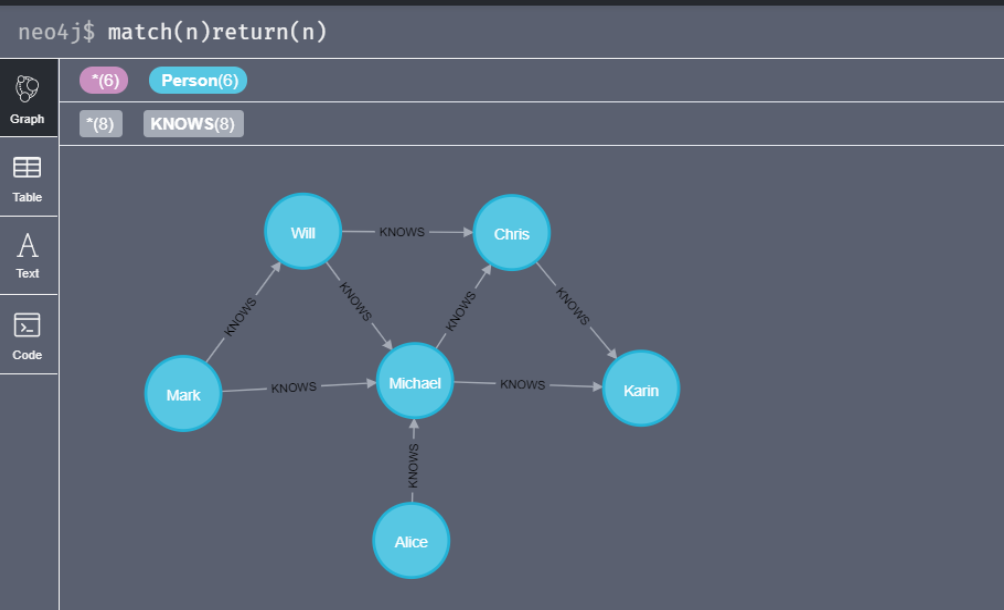

3. Creamos un grafo usando la proyección nativa y almacenado dentro del nombre myGraph.

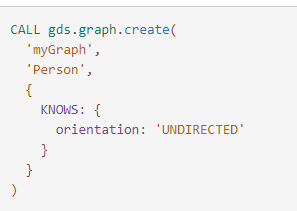

###### Resultado
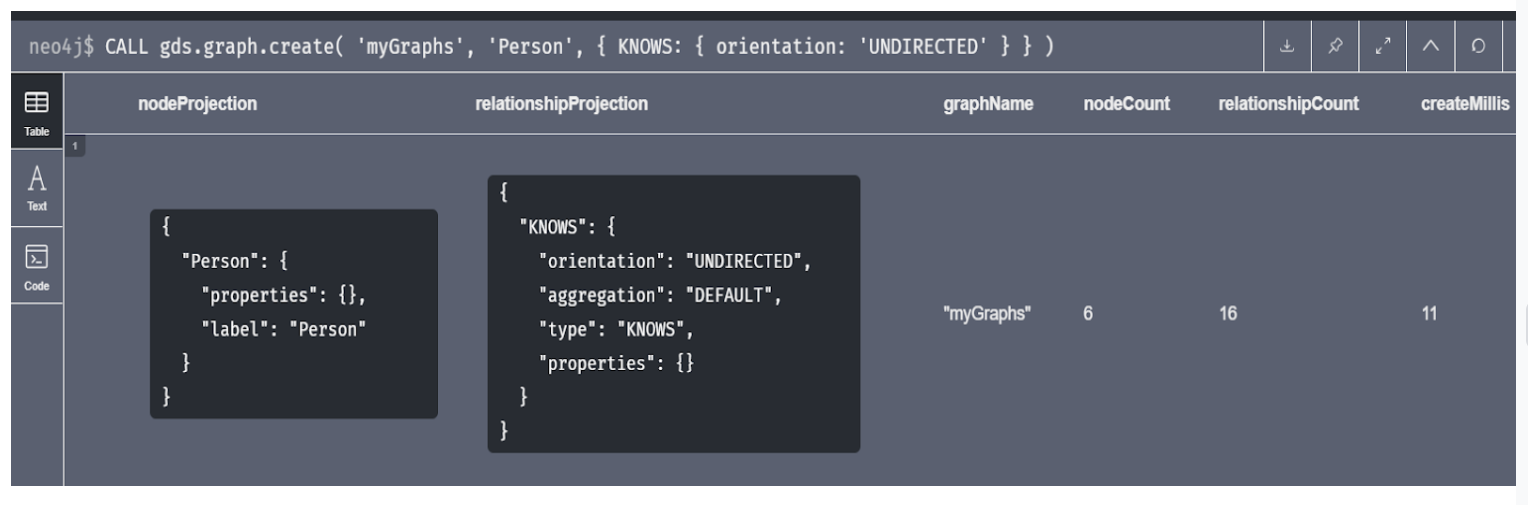


###### Estimacion de Memoria

Calculamos el costo de ejecutar el algoritmo utilizando el estimate procedimiento

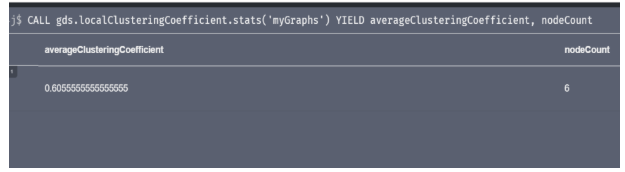

###### Resultado

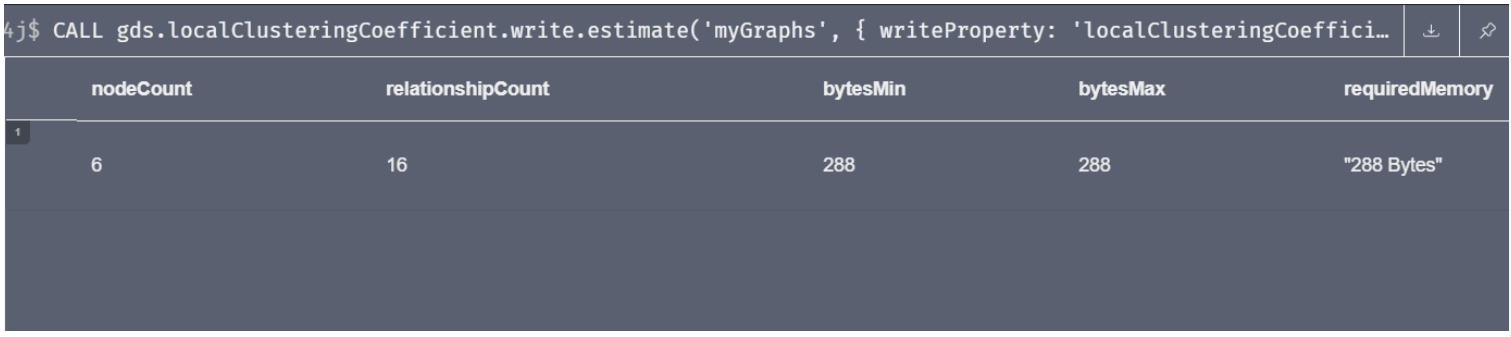
###### Corriente

4. Coeficiente de agrupación local en modo continuo
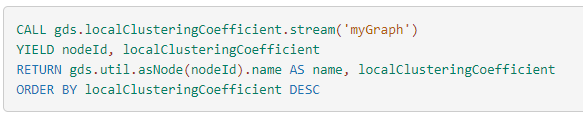

###### Resultado

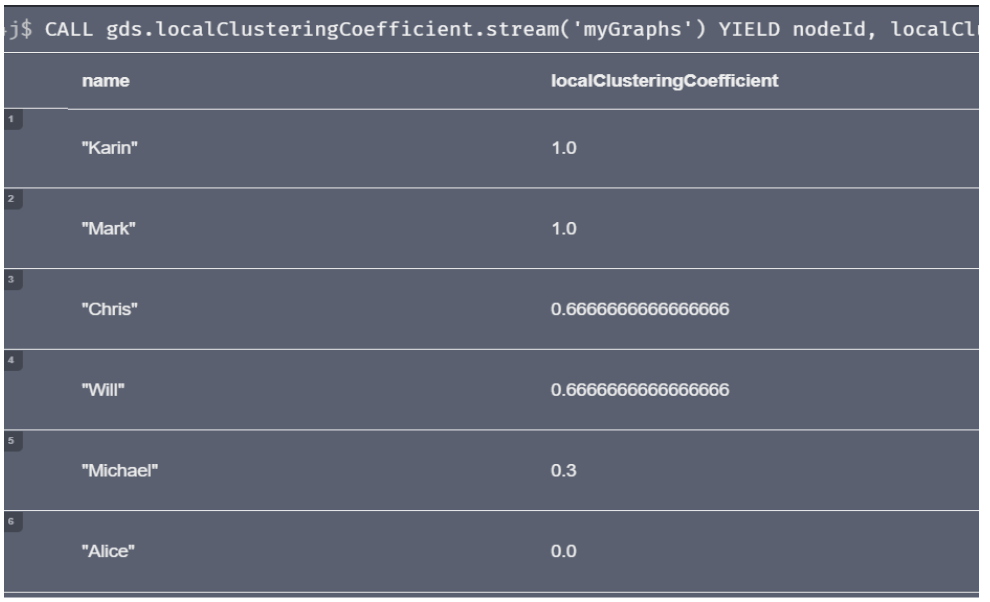

###### Estadistico

5. Coeficiente de agrupación local en modo estadistico

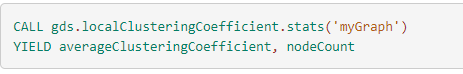
###### Resultado

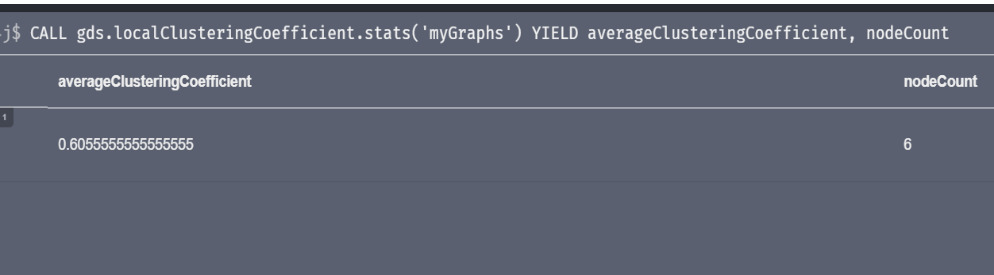


6. Lo siguiente calcula los recuentos de triángulos y almacena el resultado
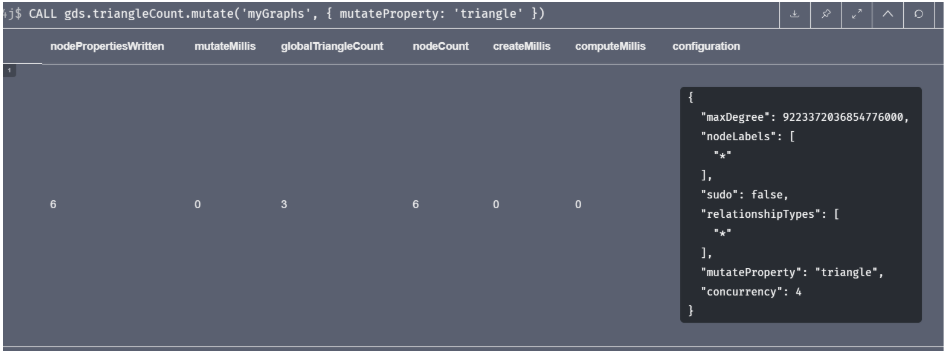

7. Se ejecutará  el algoritmo en modo continuo  usando recuentos de triángulos precalculados: 
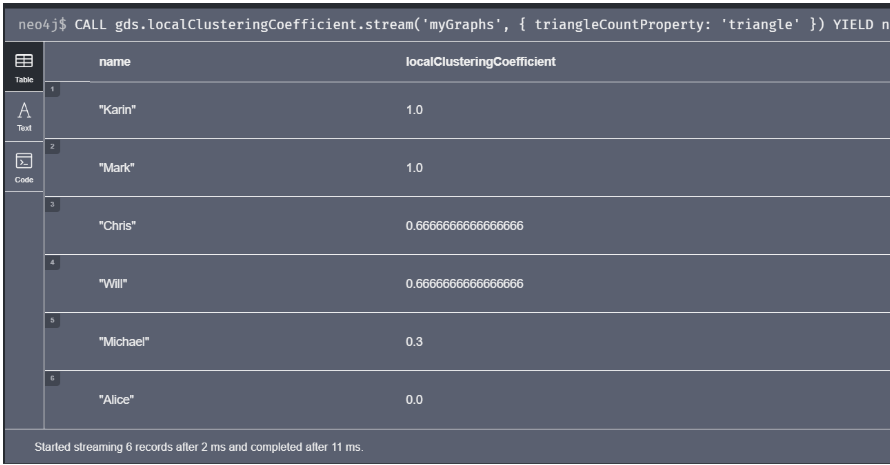

## Ejemplificación usando datos reales

In [10]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "quito"), encrypted=False)
session = driver.session()

 ## Quito

Análisis de un grafo que toma los datos de ciertos lugares de la ciudad de Quito, en donde analizaremos la deteccion de la comunidad agrupando por su nivel de calidad.

1. Grafico de muestra
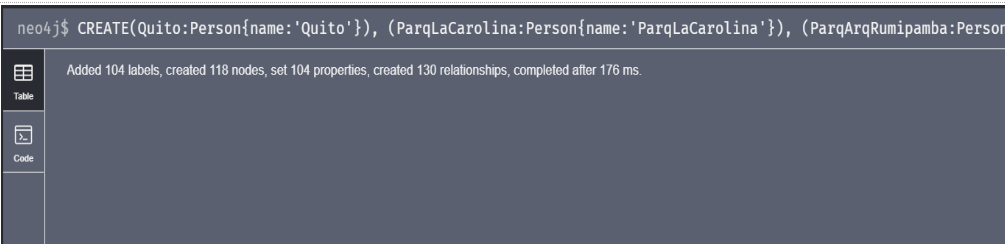

2. Grafico de nodos

Match(n) return(n)

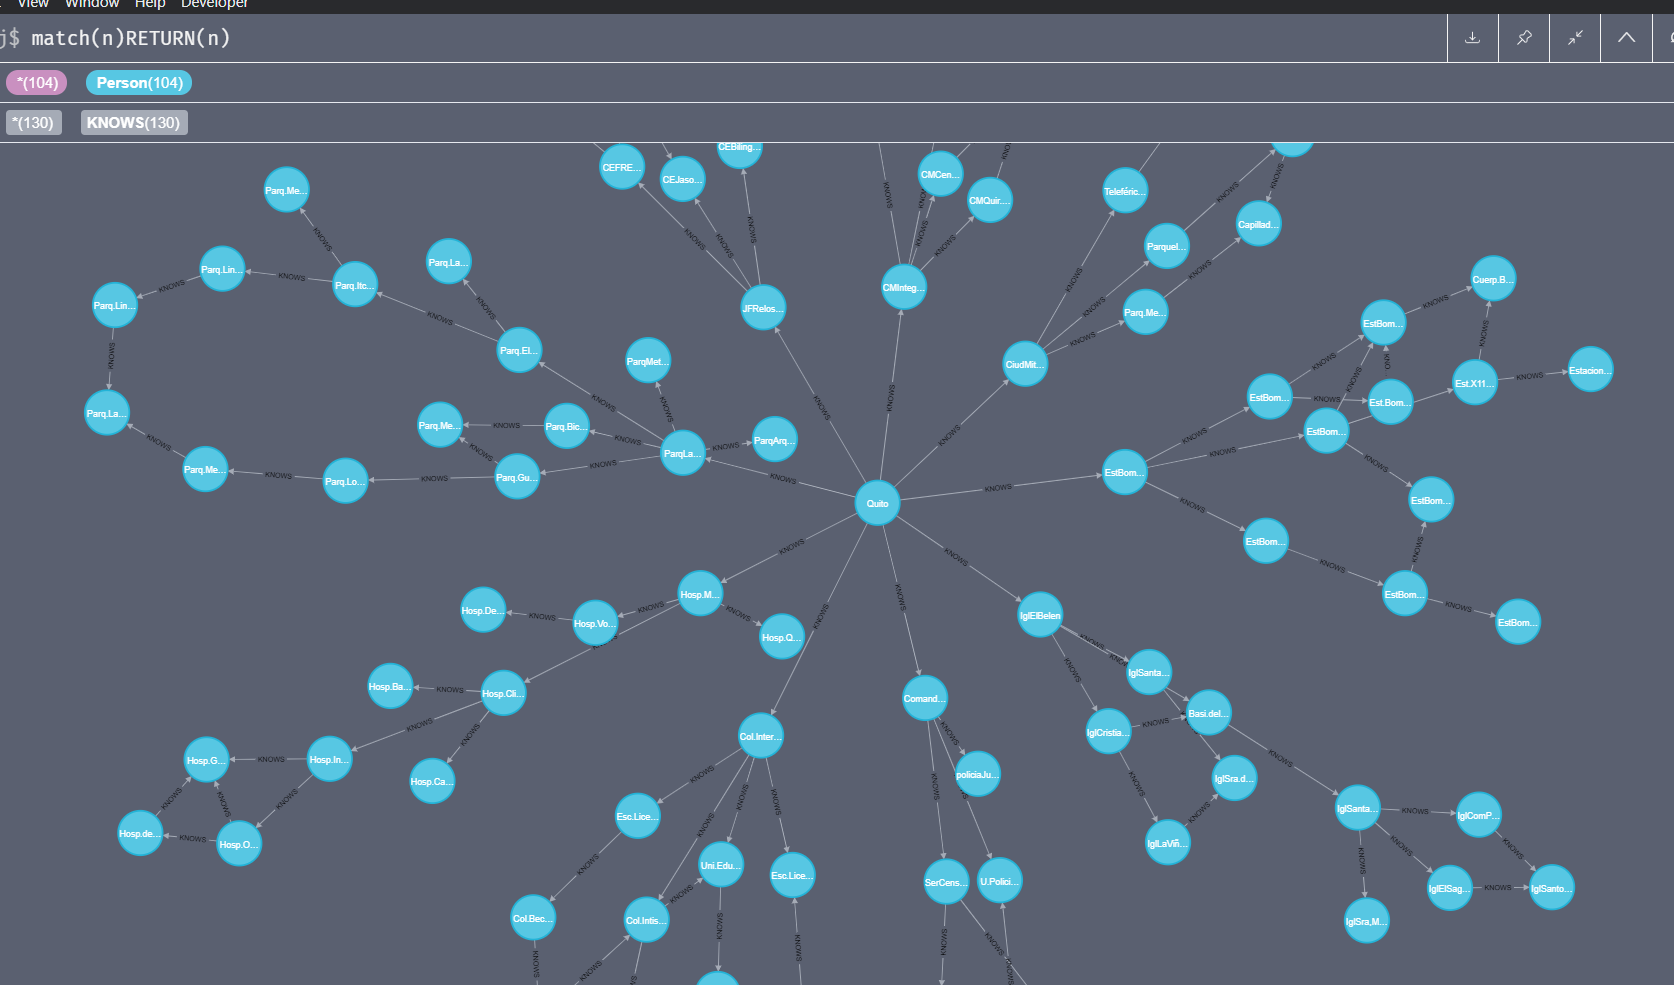


2. Creamos la coleccion de los datos, y lo almacenará en el catálogo de gráficos con el nombre 'myGraph

3. ***Creamos la coleccion de los datos***

    CALL gds.graph.create(
      'MyGraph',
      'Person',
      {
        KNOWS: {
          orientation: 'UNDIRECTED'
        }
      }
    )
 
 ***Resultado***
    
    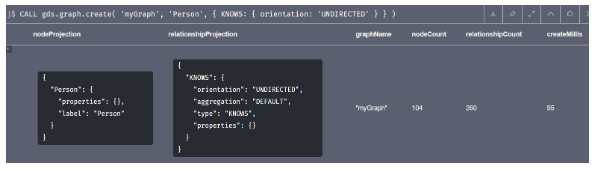

### Estmación de memoria
4. Utilizamos el estimate procedimiento, para comprender el impacto de la memoria que se ejecutara dentro del algoritmo 


In [23]:
result = session.run("""CALL gds.localClusteringCoefficient.write.estimate('MyGraph', {    
      writeProperty: 'localClusteringCoefficient'
    })
    YIELD nodeCount, relationshipCount, bytesMin, bytesMax, requiredMemory
 """)
print("**** Estimacion de Memoria ***")

DataFrame(result.data())

**** Estimacion de Memoria ***


bytesMax  bytesMin  nodeCount  relationshipCount requiredMemory
0      1856      1856        104                260     1856 Bytes

 ***Resultado***
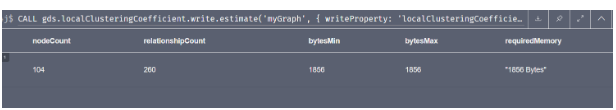

### Corriente
5.Utilizamos el stream en modo de ejecución, el algoritmo devuelve el coeficiente de agrupación local para cada nodo. perimitiendo inspeccionar los resultados directamente sin ningún efecto secundario.

In [29]:
result = session.run("""CALL gds.localClusteringCoefficient.stream('MyGraph')
    YIELD nodeId, localClusteringCoefficient
    RETURN gds.util.asNode(nodeId).name AS name, localClusteringCoefficient
    ORDER BY localClusteringCoefficient DESC""")

DataFrame(result.data())

localClusteringCoefficient                         name
0                      1.000000          Hosp.delSurE.Garces
1                      1.000000       Est.BomLorenzodecepeda
2                      0.666667      Hosp.ObstrenticoI.Ayora
3                      0.666667                Hosp.GonzaloG
4                      0.333333                  Hosp.Ingles
5                      0.333333                 Col.Intisana
6                      0.333333            Uni.EduJulioVerne
7                      0.333333               Col.SanGabriel
8                      0.333333      IglCristianaSupresencia
9                      0.333333         Basi.delBotoNacional
10                     0.333333        EstBomN1CoronelMartin
11                     0.166667  Uni.EduMuniciParqlSebastian
12                     0.166667                   IglElBelen
13                     0.166667                     EstBomN7
14                     0.100000         Col.InternacionalSEK
15                     0.000000                        Quito
16                     0.000000               ParqLaCarolina
17                     0.000000           ParqArqRumiParqmba
18                     0.000000       ParqMetropolitanaQuito
19                     0.000000                 Parq.ElEjido
20                     0.000000                 Parq.Guapulo
21                     0.000000           Parq.Bicentenario:
22                     0.000000               Parq.LaAlameda
23                     0.000000               Parq.Itchimbia
24                     0.000000           Parq.LosAlgaborros
25                     0.000000    Parq.Metrop.Guanguiltagua
26                     0.000000      Parq.Metrop.Chilibuloua
27                     0.000000        Parq.LinealMachangara
28                     0.000000          Parq.LinealQuitoSur
29                     0.000000        Parq.Metrop.LaArmenia
..                          ...                          ...
74                     0.000000             ParquelaCarolina
75                     0.000000            Parq.Metrop.Quito
76                     0.000000         BasilicaVotoNacional
77                     0.000000          JardinBotánicoQuito
78                     0.000000                  PlazaGrande
79                     0.000000                   PlazaForch
80                     0.000000             CapilladelHombre
81                     0.000000              CMIntegralAXXIS
82                     0.000000              CMKenzenMedical
83                     0.000000                    CMPraxmed
84                     0.000000                  CMCendiavia
85                     0.000000              CMQuir.CruzRoja
86                     0.000000                    PraxMEDCM
87                     0.000000                CMAprofeQuito
88                     0.000000             Dr.MarcoAlbujaCM
89                     0.000000                         CMN2
90                     0.000000                    CMBIOTEST
91                     0.000000         MetroRedLaCarolinaCM
92                     0.000000                   CMAlemania
93                     0.000000                 JFRelosniños
94                     0.000000             CEBilingüeAtenea
95                     0.000000                CEJasonMiller
96                     0.000000                    CEFREEDOM
97                     0.000000             CDISoloparaniños
98                     0.000000             CEJacquesBossuet
99                     0.000000     CIBilingueniñoscreativos
100                    0.000000                 C.Aten.niños
101                    0.000000                 CI.Por.niños
102                    0.000000              CELuisdelatorre
103                    0.000000  KiddosGardenGuarderiaCentro

[104 rows x 2 columns]

 ***Resultado***

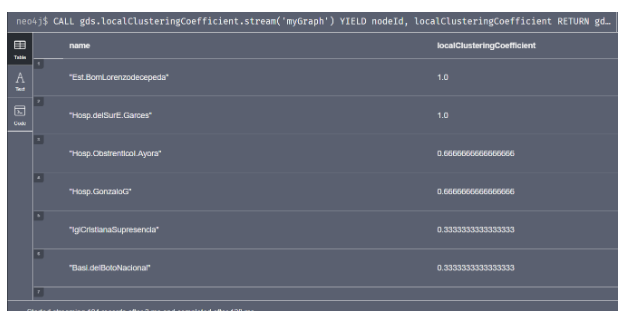

### Estadísticas
6.Utilizamos el stats en modo de ejecución, el algoritmo devuelve una única fila que contiene un resumen del resultado del algoritmo.

In [31]:
result = session.run("""CALL gds.localClusteringCoefficient.stats('MyGraph')
YIELD averageClusteringCoefficient, nodeCount""")

DataFrame(result.data())

averageClusteringCoefficient  nodeCount
0                      0.060256        104

  **Resultado**
 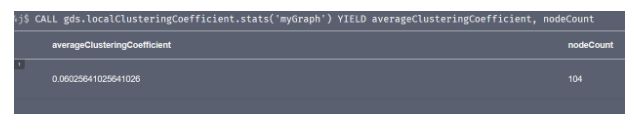

### Recuentos precalculados
7.El algoritmo de coeficiente de agrupación local ejecuta Triangle Count como parte de su cálculo.El algoritmo Triangle Count almacenará su resultado nuevamente en 'myGraph'.

In [33]:
result = session.run("""CALL gds.triangleCount.mutate('MyGraph', {
  mutateProperty: 'triangles'
})""")
DataFrame(result.data())

computeMillis                                      configuration  \
0              0  {'maxDegree': 9223372036854775807, 'nodeLabels...   

   createMillis  globalTriangleCount  mutateMillis  nodeCount  \
0             1                    6             1        104   

   nodePropertiesWritten  
0                    104

***Ejecuta el algoritmo en modo stream usando recuentos de triángulos precalculados:***


In [35]:
result = session.run("""CALL gds.localClusteringCoefficient.stream('MyGraph', {
  triangleCountProperty: 'triangles'
})
YIELD nodeId, localClusteringCoefficient
RETURN gds.util.asNode(nodeId).name AS name, localClusteringCoefficient
ORDER BY localClusteringCoefficient DESC""")
DataFrame(result.data())

localClusteringCoefficient                         name
0                      1.000000          Hosp.delSurE.Garces
1                      1.000000       Est.BomLorenzodecepeda
2                      0.666667      Hosp.ObstrenticoI.Ayora
3                      0.666667                Hosp.GonzaloG
4                      0.333333                  Hosp.Ingles
5                      0.333333                 Col.Intisana
6                      0.333333            Uni.EduJulioVerne
7                      0.333333               Col.SanGabriel
8                      0.333333      IglCristianaSupresencia
9                      0.333333         Basi.delBotoNacional
10                     0.333333        EstBomN1CoronelMartin
11                     0.166667  Uni.EduMuniciParqlSebastian
12                     0.166667                   IglElBelen
13                     0.166667                     EstBomN7
14                     0.100000         Col.InternacionalSEK
15                     0.000000                        Quito
16                     0.000000               ParqLaCarolina
17                     0.000000           ParqArqRumiParqmba
18                     0.000000       ParqMetropolitanaQuito
19                     0.000000                 Parq.ElEjido
20                     0.000000                 Parq.Guapulo
21                     0.000000           Parq.Bicentenario:
22                     0.000000               Parq.LaAlameda
23                     0.000000               Parq.Itchimbia
24                     0.000000           Parq.LosAlgaborros
25                     0.000000    Parq.Metrop.Guanguiltagua
26                     0.000000      Parq.Metrop.Chilibuloua
27                     0.000000        Parq.LinealMachangara
28                     0.000000          Parq.LinealQuitoSur
29                     0.000000        Parq.Metrop.LaArmenia
..                          ...                          ...
74                     0.000000             ParquelaCarolina
75                     0.000000            Parq.Metrop.Quito
76                     0.000000         BasilicaVotoNacional
77                     0.000000          JardinBotánicoQuito
78                     0.000000                  PlazaGrande
79                     0.000000                   PlazaForch
80                     0.000000             CapilladelHombre
81                     0.000000              CMIntegralAXXIS
82                     0.000000              CMKenzenMedical
83                     0.000000                    CMPraxmed
84                     0.000000                  CMCendiavia
85                     0.000000              CMQuir.CruzRoja
86                     0.000000                    PraxMEDCM
87                     0.000000                CMAprofeQuito
88                     0.000000             Dr.MarcoAlbujaCM
89                     0.000000                         CMN2
90                     0.000000                    CMBIOTEST
91                     0.000000         MetroRedLaCarolinaCM
92                     0.000000                   CMAlemania
93                     0.000000                 JFRelosniños
94                     0.000000             CEBilingüeAtenea
95                     0.000000                CEJasonMiller
96                     0.000000                    CEFREEDOM
97                     0.000000             CDISoloparaniños
98                     0.000000             CEJacquesBossuet
99                     0.000000     CIBilingueniñoscreativos
100                    0.000000                 C.Aten.niños
101                    0.000000                 CI.Por.niños
102                    0.000000              CELuisdelatorre
103                    0.000000  KiddosGardenGuarderiaCentro

[104 rows x 2 columns]

 **Resultado**
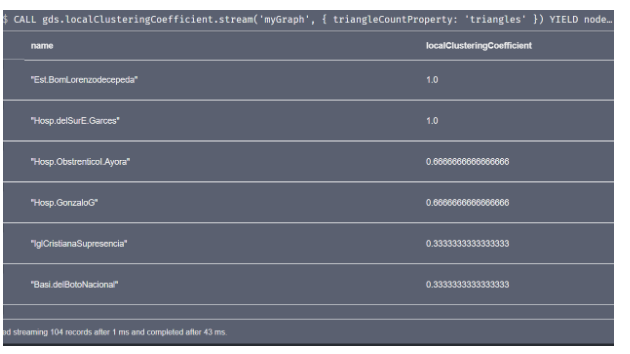

#### Resultados y análisis:

Como podemos ver, los resultados son los mismos que en el ***stream***, por lo que observasmos el uso de la estimacion de memoria que ocupara para ejecutar el algortimo.

#### Coclusión:

Este algoritmo nos permitio identificar, y agrupar según el nivel de calidad evaluando de como se agrupan los nodos dentro de una red social.

# Algoritmos de Similitud

Calculan la similitud de pares de nodos utilizando diferentes métricas basadas en vectores.

## Distancia Euclidiana

### Que és?

La distancia euclidiana mide la distancia en línea recta entre dos puntos en el espacio n-dimensional. En matemáticas, álgebra, geometría y, más específicamente, en análisis real, análisis complejo y geometría analítica, se trata de una función usada en diversos contextos para calcular la distancia entre dos puntos , primero en el plano y luego en el espacio. También sirve para definir la distancia entre dos puntos en otros tipos de espacios de tres o más dimensiones. Y para hallar la longitud de un segmento definido por dos puntos de una recta, del plano o de espacios de mayor dimensión.

La similitud de superposición se calcula utilizando la siguiente fórmula:

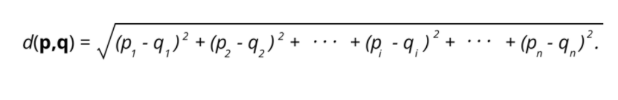

#### Cuándo usar el algoritmo de distancia euclidiana

Podemos usar el algoritmo de distancia euclidiana para determinar la similitud entre dos cosas. Entonces podríamos usar la similitud calculada como parte de una consulta de recomendación. 

#### Función de algoritmo de distancia euclidiana
La función de distancia euclidiana calcula la similitud de dos listas de números.
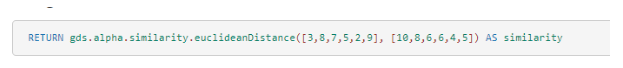

## Ejemplo Sencillo
 
 Procedimientos de algoritmo de la distancia Euclediana
 
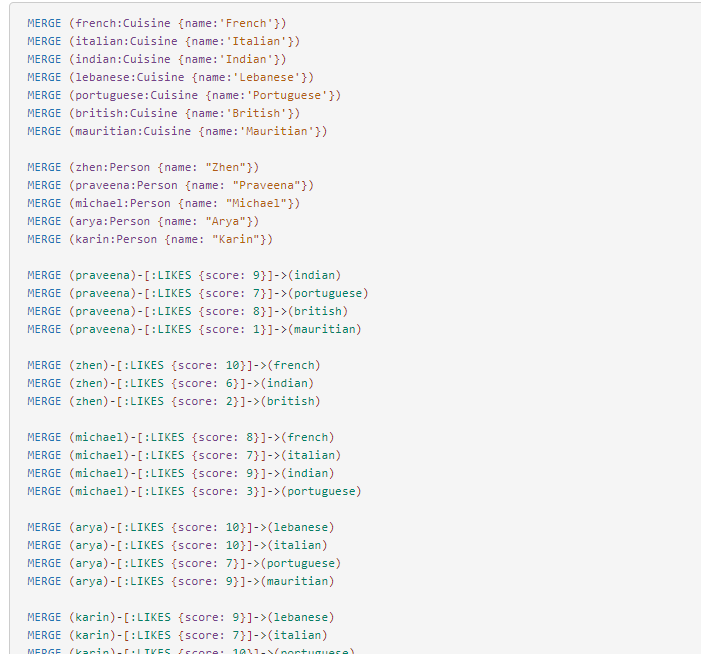
  **Resultado**
 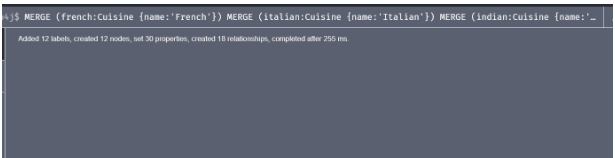

3.**Devolverá una secuencia de pares de nodos, junto con su intersección y similitudes euclidianas:**
     
     MATCH (p:Person), (c:Cuisine)
     OPTIONAL MATCH (p)-[likes:LIKES]->(c)
     WITH {item:id(p), weights: collect(coalesce(likes.score, gds.util.NaN()))} AS userData
     WITH collect(userData) AS data
     CALL gds.alpha.similarity.euclidean.stream({
          nodeProjection: '*',
      relationshipProjection: '*',
      data: data,
      topK: 0
     })
         YIELD item1, item2, count1, count2, similarity
     RETURN gds.util.asNode(item1).name AS from, gds.util.asNode(item2).name AS to, similarity
     ORDER BY similarity
     
  **Resultado**
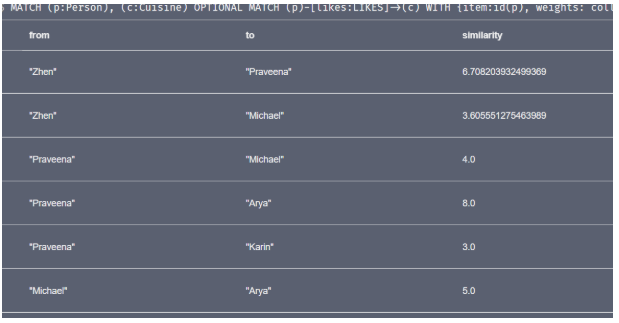

# Ejemplificacion usando Datos reales

 ## Ambato

Análisis de un grafo que toma los datos de ciertos lugares de la ciudad de Ambato, en la que verificaremos el grado de similitud entre ellos.

In [37]:
from  neo4j  import  GraphDatabase 
from pandas import DataFrame
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "ambato"), encrypted=False)
session = driver.session()

### Algoritmo de muestra
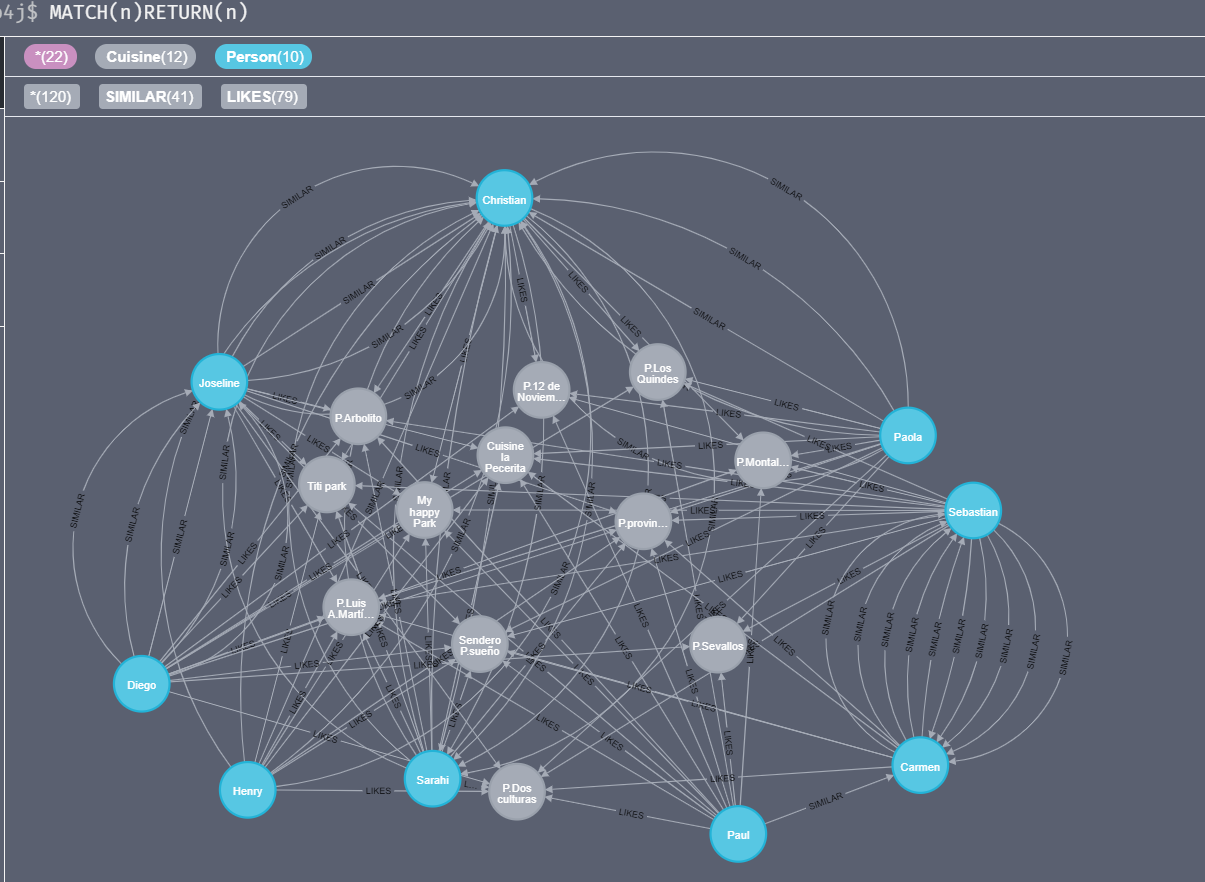

1.***Se devolverá una secuencia de pares de nodos, junto con su intersección y similitudes euclidianas:***

In [38]:
result = session.run("""MATCH (p:Person), (c:Cuisine)
 OPTIONAL MATCH (p)-[likes:LIKES]->(c)
 WITH {item:id(p), weights: collect(coalesce(likes.score, gds.util.NaN()))} AS userData
 WITH collect(userData) AS data
 CALL gds.alpha.similarity.euclidean.stream({
  nodeProjection: '*',
  relationshipProjection: '*',
  data: data,
  topK: 0
 })
 YIELD item1, item2, count1, count2, similarity
 RETURN gds.util.asNode(item1).name AS from, gds.util.asNode(item2).name AS to, similarity
 ORDER BY similarity """)

print("**** Secuencia de Nodos ***")
DataFrame(result.data())

**** Secuencia de Nodos ***


from  similarity         to
0   Christian    0.000000     Sarahi
1   Christian    0.000000      Paola
2   Christian    0.000000   Joseline
3   Christian    0.000000      Henry
4   Sebastian    3.162278     Carmen
5       Paola    3.605551      Henry
6    Joseline    4.000000      Diego
7        Paul    4.242641     Carmen
8   Christian    5.000000  Sebastian
9   Christian    5.000000      Diego
10      Paola    6.082763   Joseline
11     Sarahi    8.485281      Diego
12     Sarahi    9.055385     Carmen
13     Carmen    9.055385      Diego
14     Sarahi    9.110434  Sebastian
15     Sarahi    9.219544      Paola
16      Paola    9.273618      Diego
17     Sarahi    9.380832   Joseline
18   Joseline    9.486833      Henry
19   Joseline   10.295630     Carmen
20      Paola   10.630146  Sebastian
21  Sebastian   11.090537   Joseline
22  Sebastian   11.313708      Diego
23     Sarahi   11.401754      Henry
24      Henry   11.401754      Diego
25      Paola   12.369317     Carmen
26       Paul   12.688578   Joseline
27  Sebastian   12.806248      Henry
28       Paul   13.114877  Sebastian
29       Paul   13.379088  Christian
30       Paul   13.928388      Henry
31       Paul   14.177447     Sarahi
32     Carmen   15.033296      Henry
33       Paul   15.716234      Paola
34       Paul   16.186414      Diego
35  Christian         NaN     Carmen

**Resultado**
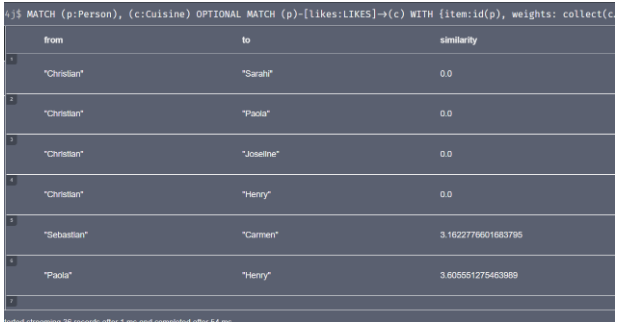

**Devolverá una secuencia de usuarios junto con el usuario más similar a ellos**

In [39]:
result = session.run("""MATCH (p:Person), (c:Cuisine)
 OPTIONAL MATCH (p)-[likes:LIKES]->(c)
 WITH {item:id(p), weights: collect(coalesce(likes.score, gds.util.NaN()))} AS userData
 WITH collect(userData) AS data
 CALL gds.alpha.similarity.euclidean.stream({
  nodeProjection: '*',
  relationshipProjection: '*',
  data: data,
  topK: 1
 })
 YIELD item1, item2, count1, count2, similarity
 RETURN gds.util.asNode(item1).name AS from, gds.util.asNode(item2).name AS to, similarity
 ORDER BY from """)

print("**** Secuencia de Nodos ***")
DataFrame(result.data())

**** Secuencia de Nodos ***


from  similarity         to
0     Carmen    3.162278  Sebastian
1  Christian    0.000000     Sarahi
2      Diego    4.000000   Joseline
3      Henry    0.000000  Christian
4   Joseline    0.000000  Christian
5      Paola    0.000000  Christian
6       Paul    4.242641     Carmen
7     Sarahi    0.000000  Christian
8  Sebastian    3.162278     Carmen

**Resultado**
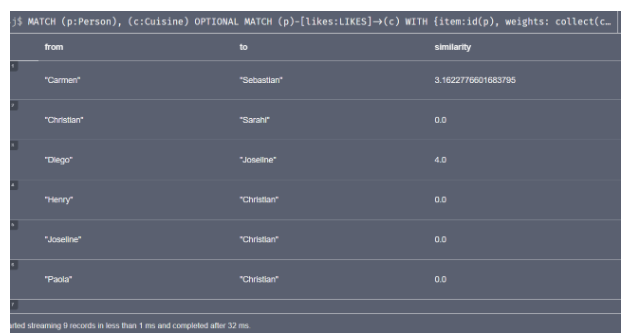

**Encontrará el usuario más similar para cada usuario y almacenará una relación entre esos usuarios:**

In [40]:
result = session.run("""WITH "MATCH (person:Person)-[likes:LIKES]->(c)
       RETURN id(person) AS item, id(c) AS category, likes.score AS weight" AS query
 CALL gds.alpha.similarity.euclidean.write({
  nodeProjection: '*',
  relationshipProjection: '*',
  data: query,
  graph: 'cypher',
  topK: 1,
  similarityCutoff: 4.0
 })
 YIELD nodes, similarityPairs, writeRelationshipType, writeProperty, min, max, mean, stdDev, p95
 RETURN nodes, similarityPairs, writeRelationshipType, writeProperty, min, max, mean, p95 """)

print("Distancia Euclidiana")

DataFrame(result.data())

Distancia Euclidiana


max      mean  min  nodes       p95  similarityPairs writeProperty  \
0  4.000015  1.290571  0.0      9  4.000015                8         score   

  writeRelationshipType  
0               SIMILAR

**Resultado**
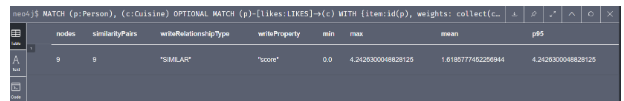

**Lista los lugares que le gusta a la Persona.**

In [41]:
result = session.run("""MATCH (p:Person {name: "Sarahi"})-[:SIMILAR]->(other),
           (other)-[:LIKES]->(cuisine)
     WHERE not((p)-[:LIKES]->(cuisine))
     RETURN cuisine.name AS cuisine """)

print("Distancia Euclidiana")

DataFrame(result.data())

Distancia Euclidiana


cuisine
0          P.Montalvo
1       P.Los Quindes
2   P.12 de Noviembre
3          P.Montalvo
4       P.Los Quindes
5   P.12 de Noviembre
6          P.Montalvo
7       P.Los Quindes
8   P.12 de Noviembre
9          P.Montalvo
10      P.Los Quindes
11  P.12 de Noviembre
12         P.Montalvo
13      P.Los Quindes
14  P.12 de Noviembre
15         P.Montalvo
16      P.Los Quindes
17  P.12 de Noviembre

**Resultado**
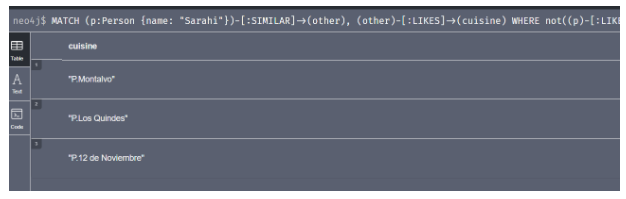

**Encontrará lo más similar entre Sarahi y Sebastian**

In [42]:
result = session.run("""MATCH (p:Person), (c:Cuisine)
     OPTIONAL MATCH (p)-[likes:LIKES]->(c)
     WITH {item:id(p), name: p.name, weights: collect(coalesce(likes.score, gds.util.NaN()))} AS userData
     WITH collect(userData) AS personCuisines
     WITH personCuisines,
          [value in personCuisines WHERE value.name IN ["Sarahi", "Sebastian"] | value.item ] AS sourceIds
     CALL gds.alpha.similarity.euclidean.stream({
      nodeProjection: '*',
      relationshipProjection: '*',
      data: personCuisines,
      sourceIds: sourceIds,
      topK: 1
     })
     YIELD item1, item2, similarity
     WITH gds.util.asNode(item1) AS from, gds.util.asNode(item2) AS to, similarity
     RETURN from.name AS from, to.name AS to, similarity
     ORDER BY similarity DESC """)

print("Similitud")

DataFrame(result.data())

Similitud


from  similarity         to
0  Sebastian    3.162278     Carmen
1     Sarahi    0.000000  Christian

**Resultado**
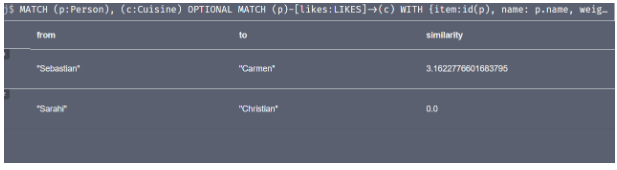

**Encontrará la similitud**

In [43]:
result = session.run("""MATCH (c:Cuisine)
 WITH {item:id(c), weights: c.embedding} AS userData
 WITH collect(userData) AS data
 CALL gds.alpha.similarity.euclidean.stream({
  nodeProjection: '*',
  relationshipProjection: '*',
  data: data,
  skipValue: null
 })
 YIELD item1, item2, count1, count2, similarity
 RETURN gds.util.asNode(item1).name AS from, gds.util.asNode(item2).name AS to, similarity
 ORDER BY similarity DESC """)

print("Similitud")

DataFrame(result.data())

Similitud


from  similarity                    to
0          My happy Park    0.925635       Sendero P.sueño
1          My happy Park    0.899667   Cuisine la Pecerita
2    Cuisine la Pecerita    0.783709  P.provincial.familia
3        Sendero P.sueño    0.780961        P.Dos culturas
4         P.Dos culturas    0.780961       Sendero P.sueño
5    Cuisine la Pecerita    0.777689             Titi park
6         P.Dos culturas    0.750933             Titi park
7          My happy Park    0.733348  P.provincial.familia
8              Titi park    0.702353     P.Luis A.Martínez
9      P.Luis A.Martínez    0.696419        P.Dos culturas
10        P.Dos culturas    0.696419     P.Luis A.Martínez
11     P.Luis A.Martínez    0.681982   Cuisine la Pecerita
12   Cuisine la Pecerita    0.681982     P.Luis A.Martínez
13  P.provincial.familia    0.630476     P.Luis A.Martínez
14     P.Luis A.Martínez    0.630476  P.provincial.familia
15  P.provincial.familia    0.618061             Titi park
16             Titi park    0.618061  P.provincial.familia
17  P.provincial.familia    0.484562       Sendero P.sueño
18       Sendero P.sueño    0.484562  P.provincial.familia
19       Sendero P.sueño    0.462601             Titi park
20             Titi park    0.462601       Sendero P.sueño

**Resultado**
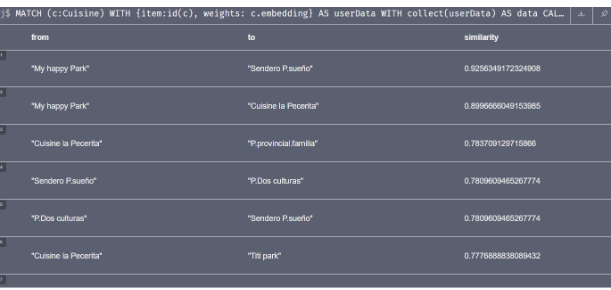

### Resultados

Podemos analizar que la hay una exacata similititus en los gusto al momento de escoger un parque en especifico.
### Conclusion

Concluimos que la distancia euclidiana, nos permite encotrar una similitud de los los parques que con mas frecuencia visitan las personas